In [9]:
# Normal imports for everybody
import keras
from keras.layers import LSTM, Dense, Bidirectional, Conv1D, MaxPool1D, Flatten, BatchNormalization, Dropout
from keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
t=time.time()
X=np.loadtxt('X.csv',delimiter=',')
Y=np.loadtxt('Y.csv',delimiter=',')
print(time.time()-t)
print(np.shape(X),np.shape(Y))

417.98628282546997
(24571, 5000) (24571, 500)


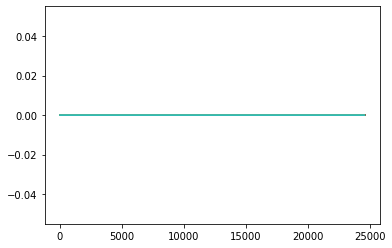

[-0.82188075  3.35414138  0.77480965 -0.57932854] [0.17953081 0.08178025 0.12285084 0.04704531]


In [3]:
X=np.reshape(X,(-1,1000,5))

plt.plot(X[:,:,4])
plt.show()
X=X[:,:,:4]

eps=1e-15

X=X*(X>0)
X=np.log10(X+eps)

#Normalising X
x_mean=np.mean(np.mean(X,axis=0),axis=0)
x_std=np.std(np.std(X,axis=0),axis=0)
print(x_mean,x_std)
for i in range(4):
    X[:,:,i]=(X[:,:,i]-x_mean[i])/x_std[i]

#X=np.reshape(X,(-1,1000*4))

Y=np.log10(Y*1e20)

#Min_Max Scaling of Y
y_min=np.min(Y)
Y=Y-y_min
y_max=np.max(Y)
Y=Y/y_max


In [15]:
model = keras.Sequential()
model.add(Conv1D(filters = 16, kernel_size = 6, activation='relu', input_shape = (1000,4)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=4))

model.add(Conv1D(filters = 16, kernel_size = 6, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))

#model.add(Flatten())

model.add(Bidirectional(LSTM(50)))
model.add(Dense(500, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam') #, metrics=[mdn.get_mixture_mse_accuracy(1,N_MIXES)])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 995, 16)           400       
_________________________________________________________________
batch_normalization_11 (Batc (None, 995, 16)           64        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 248, 16)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 243, 16)           1552      
_________________________________________________________________
batch_normalization_12 (Batc (None, 243, 16)           64        
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 121, 16)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 121, 16)           0         
__________

In [16]:
history = model.fit(X, Y, batch_size=256, epochs=10, validation_split=0.15,
                    callbacks=[keras.callbacks.TerminateOnNaN()], shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 20885 samples, validate on 3686 samples
Epoch 1/10
20885/20885 [==============================] - 45s 2ms/step - loss: 0.0256 - val_loss: 0.0047
Epoch 2/10
20885/20885 [==============================] - 59s 3ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 3/10
20885/20885 [==============================] - 39s 2ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 4/10
20885/20885 [==============================] - 39s 2ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 5/10
20885/20885 [==============================] - 39s 2ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/10
20885/20885 [==============================] - 39s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/10
20885/20885 [==============================] - 39s 2ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/10
20885/20885 [==============================] - 39s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
20885/20885 [==============================] - 39s 2

In [17]:
y_hat=model.predict(X)

In [18]:
import scipy.ndimage.filters as sp
from scipy.special import softmax
import importlib
import bolsig
importlib.reload(bolsig)
from bolsig import bolsig

In [19]:
n=100

In [20]:
y_hat=sp.gaussian_filter1d(y_hat,20)

|(1000, 4)


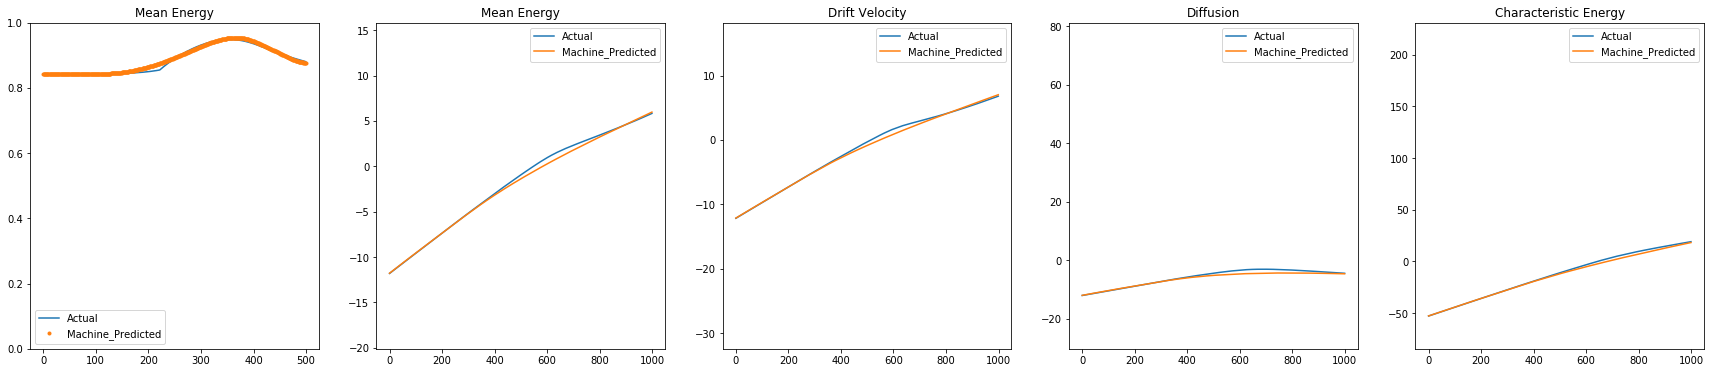

|(1000, 4)


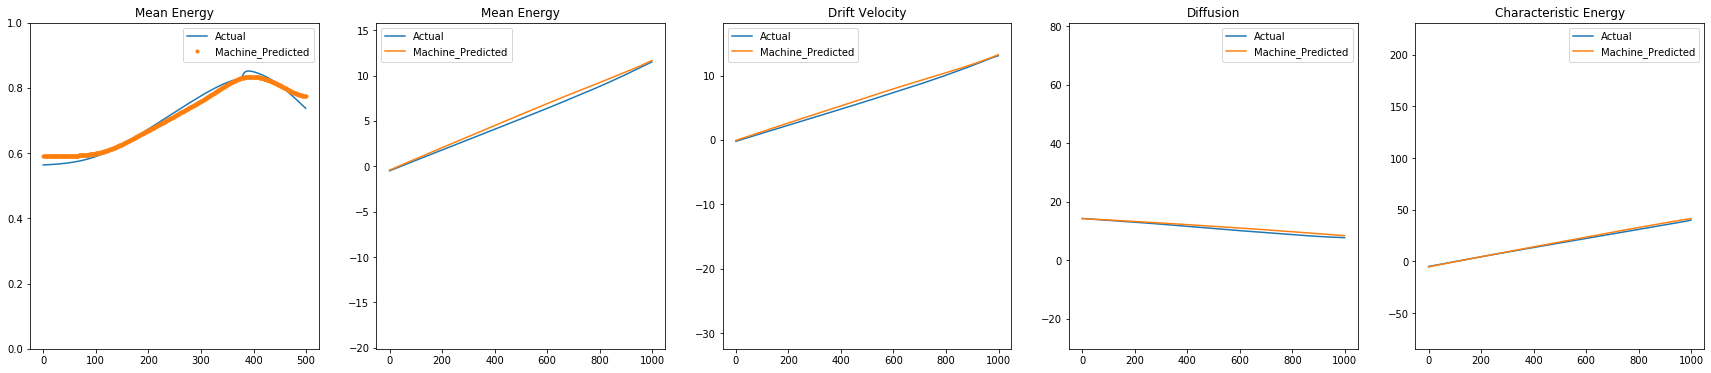

|(1000, 4)


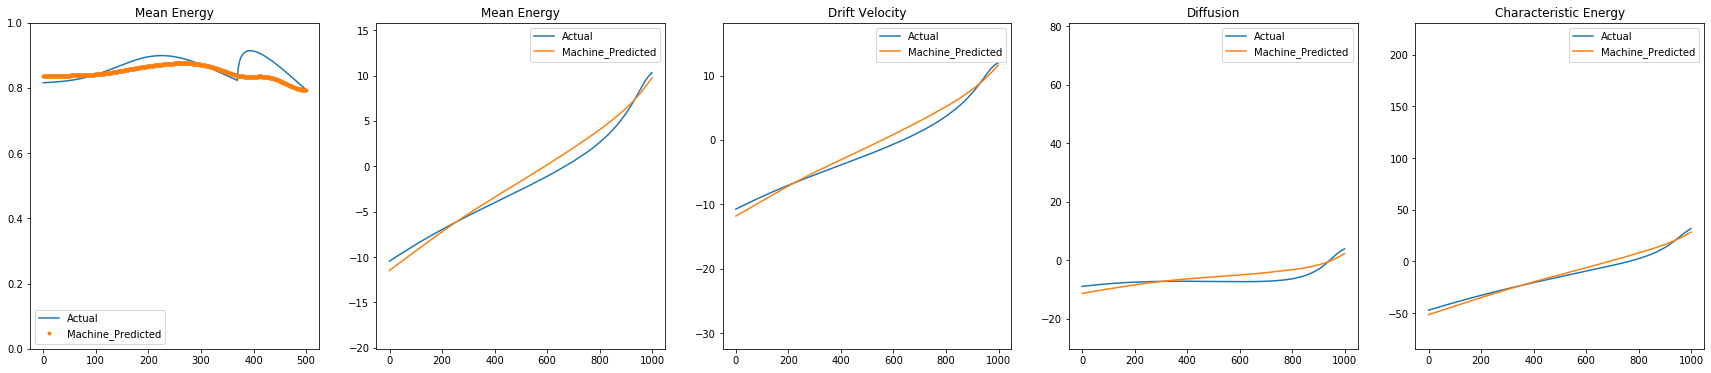

|(1000, 4)


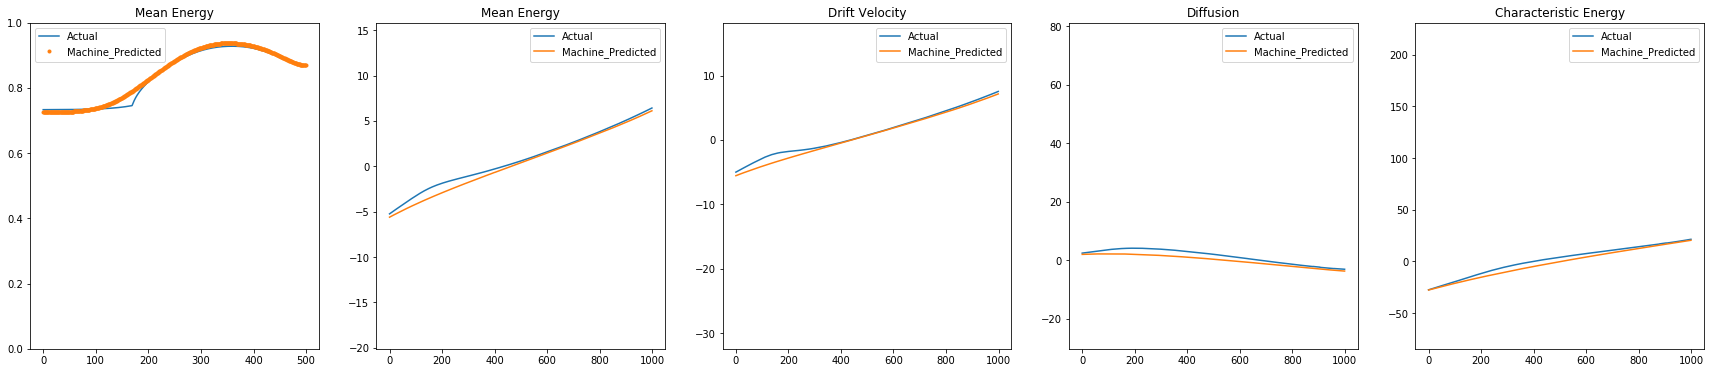

|(1000, 4)


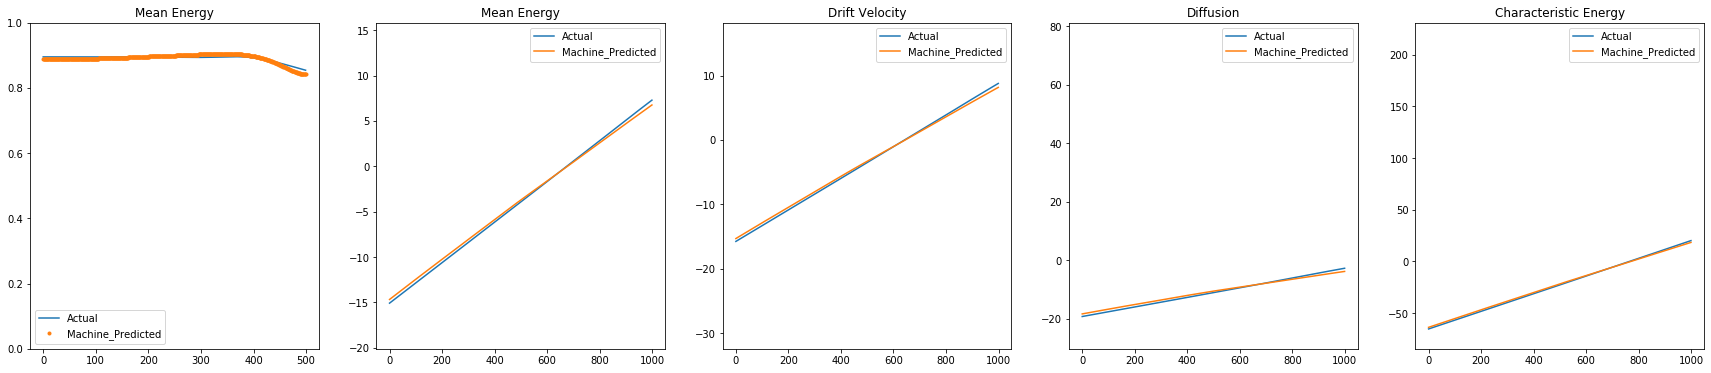

|(1000, 4)


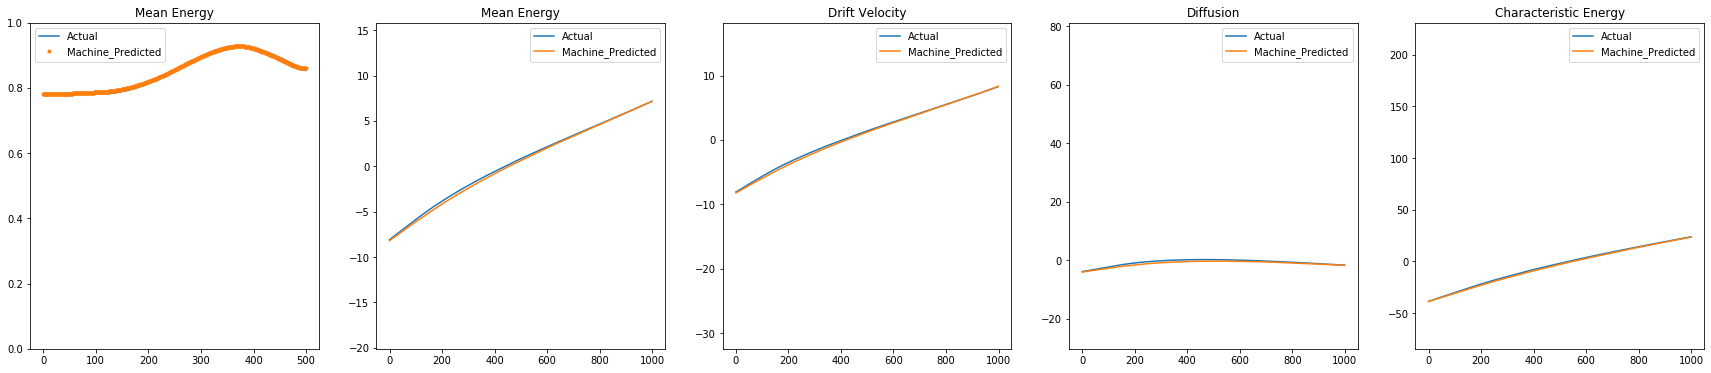

|(1000, 4)


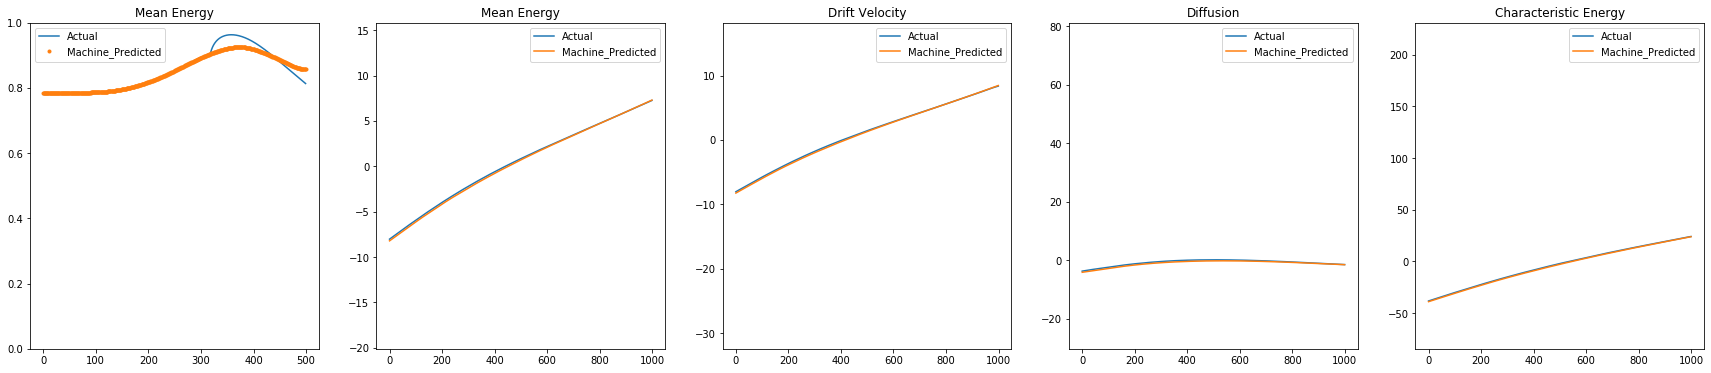

|(1000, 4)


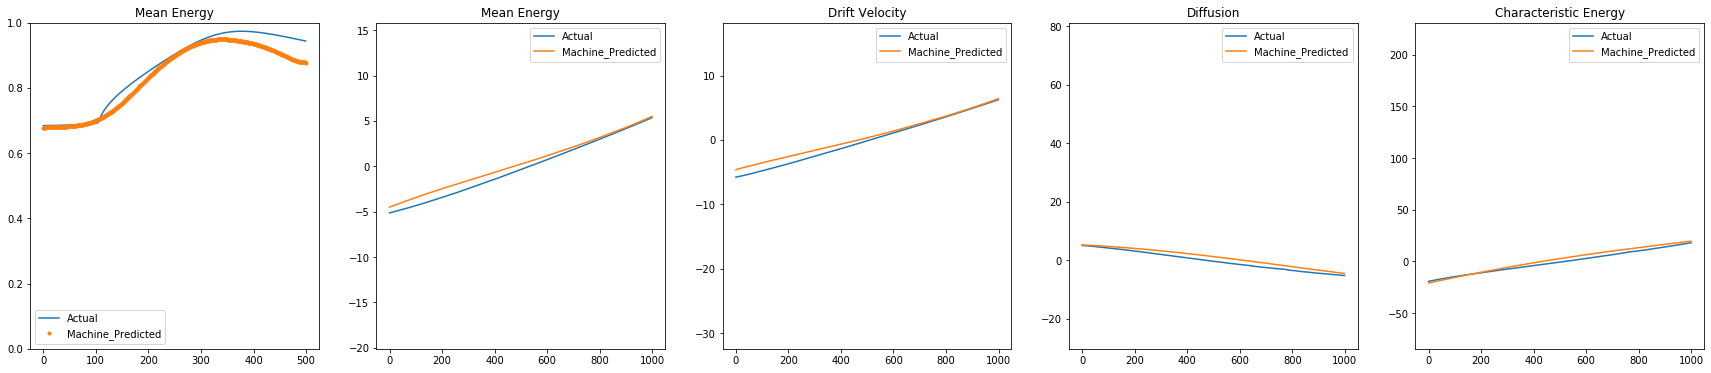

|(1000, 4)


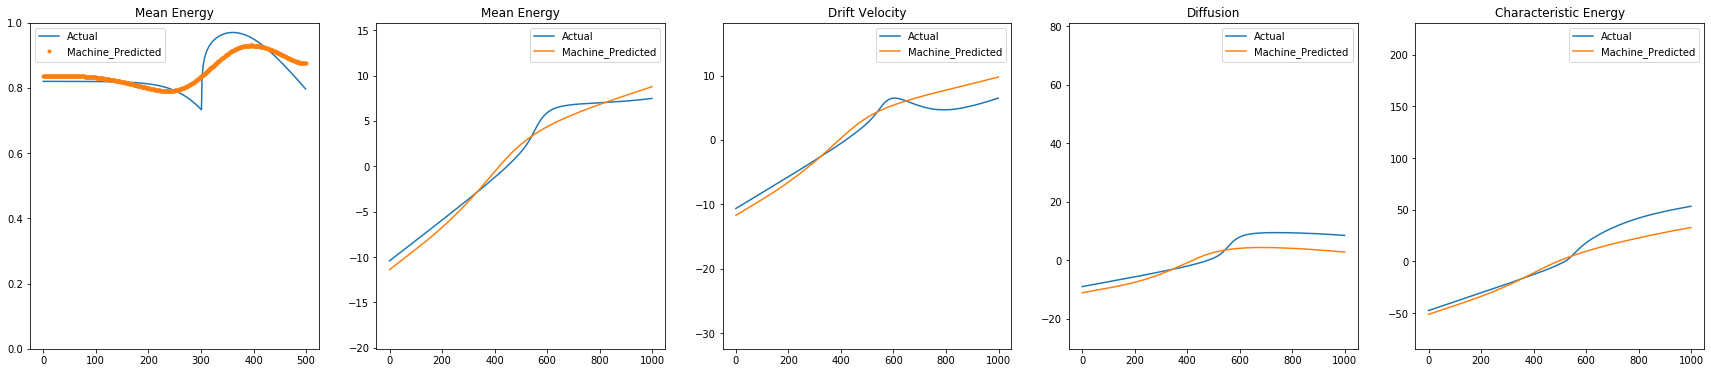

|(1000, 4)


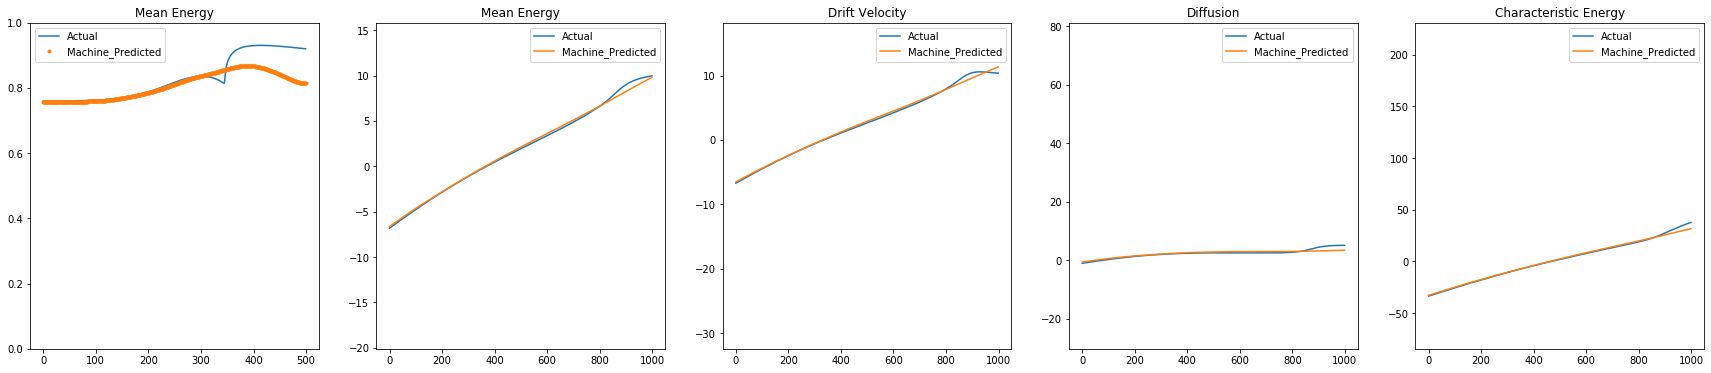

|(1000, 4)


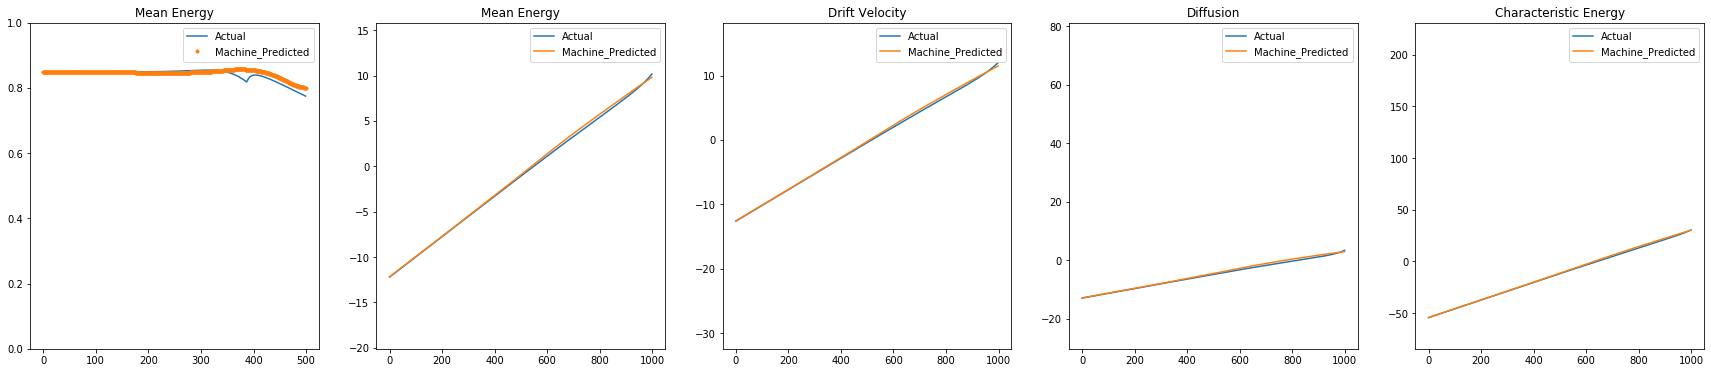

|(1000, 4)


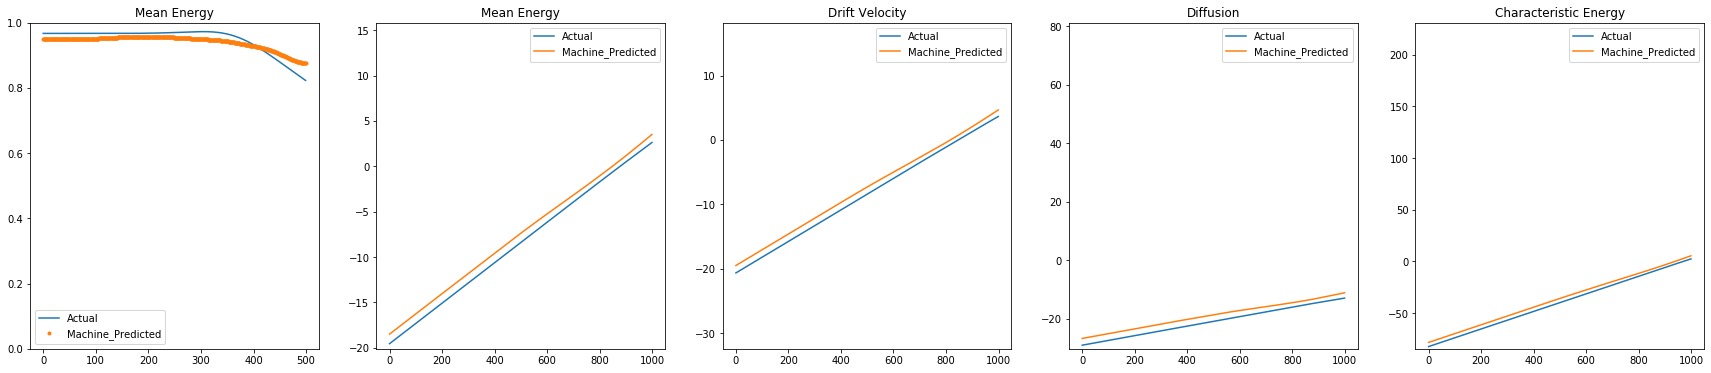

|(1000, 4)


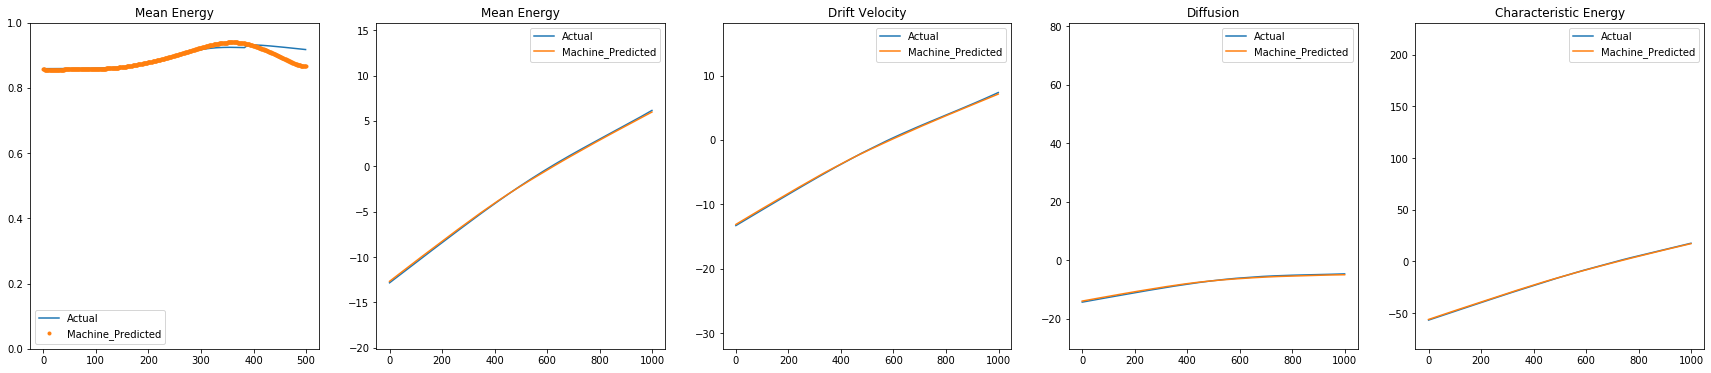

|(1000, 4)


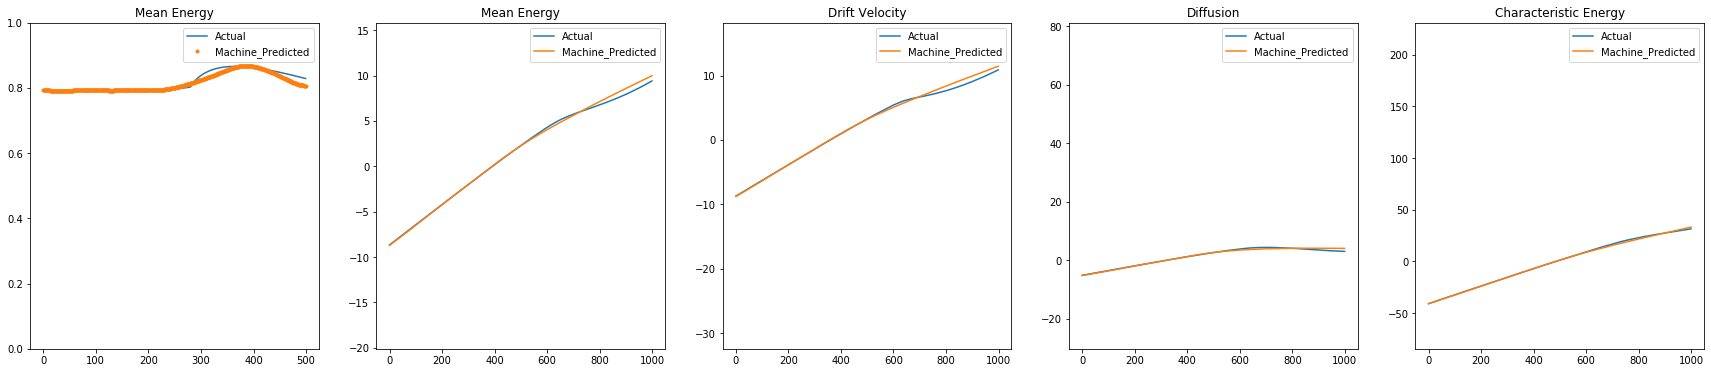

|(1000, 4)


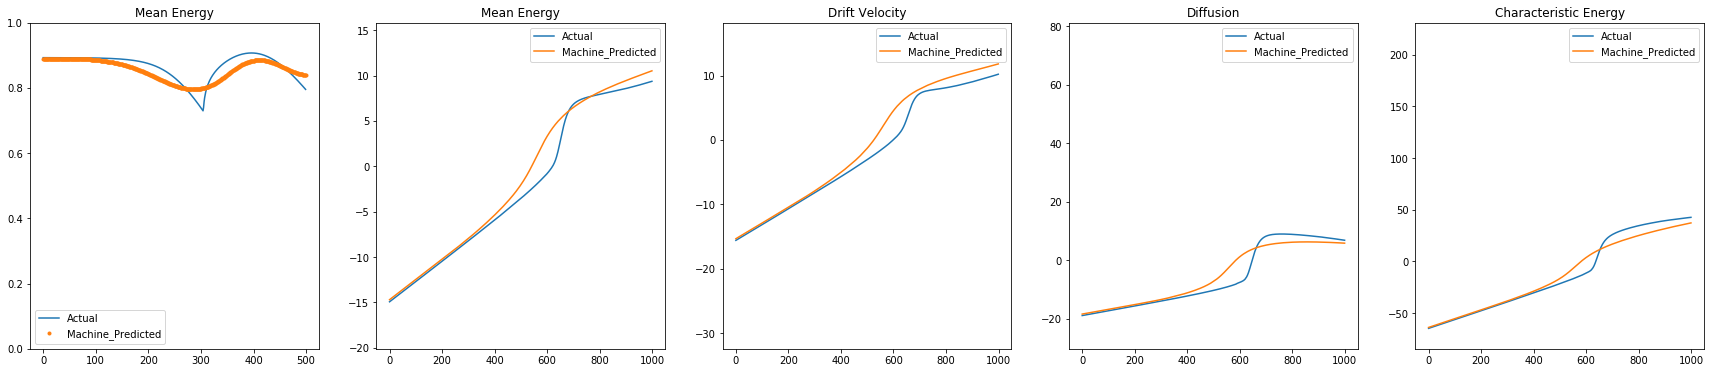

|(1000, 4)


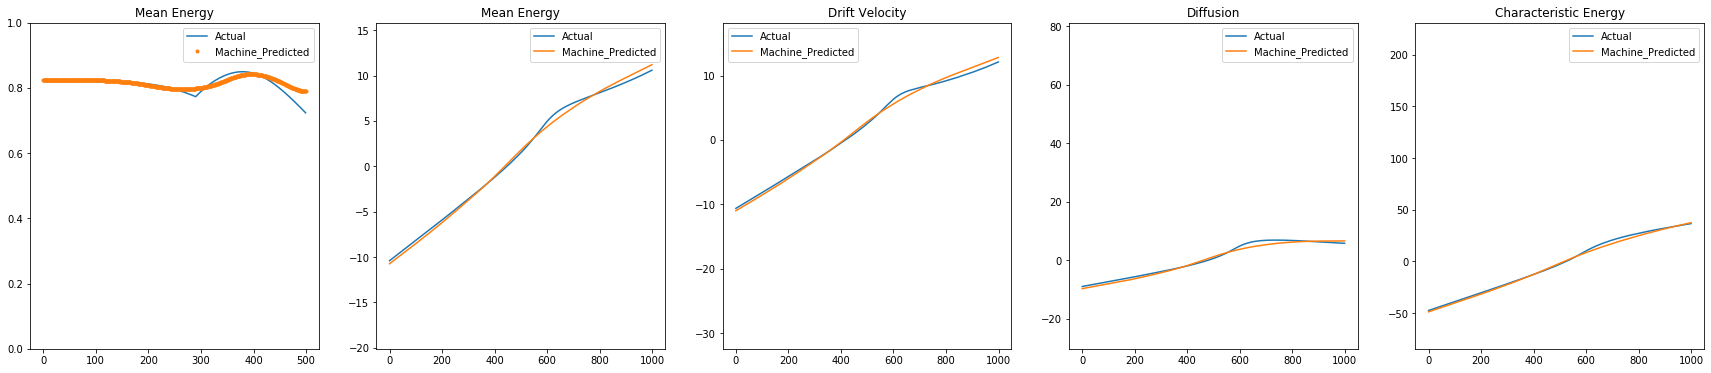

|(1000, 4)


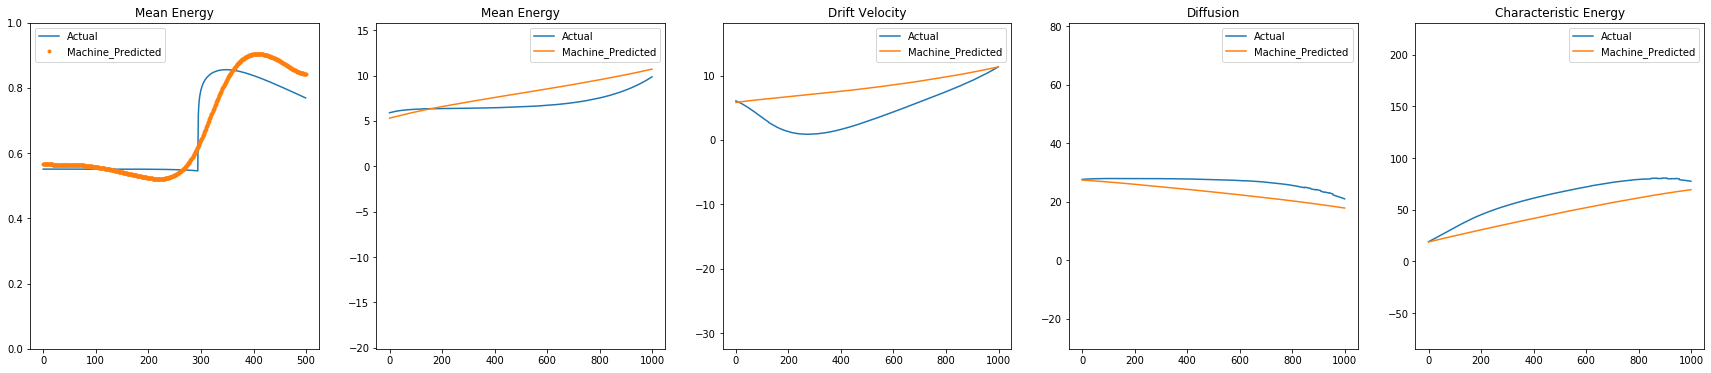

|(1000, 4)


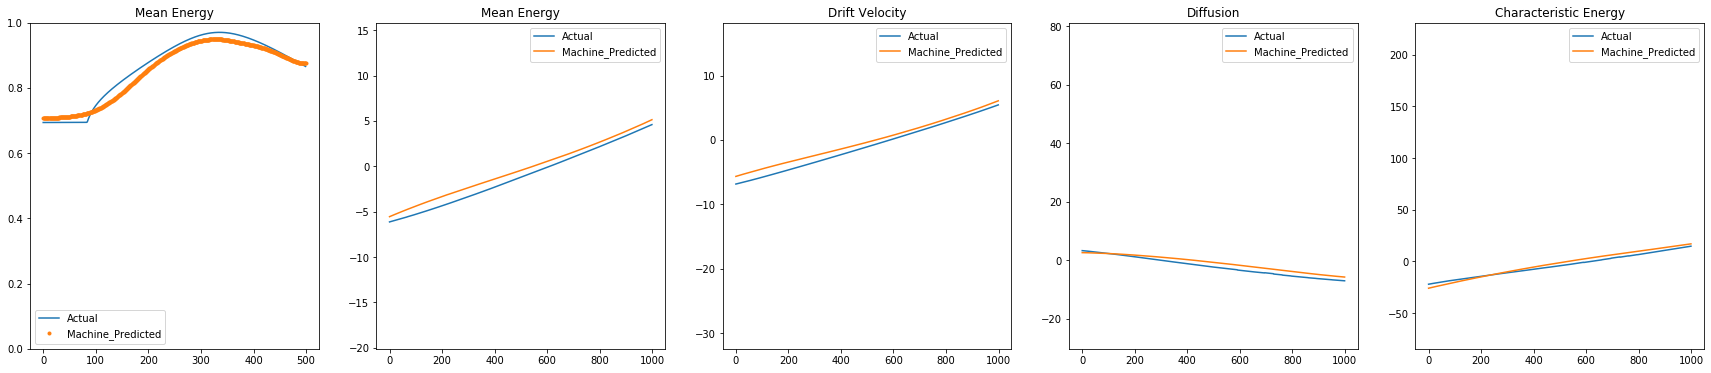

|(1000, 4)


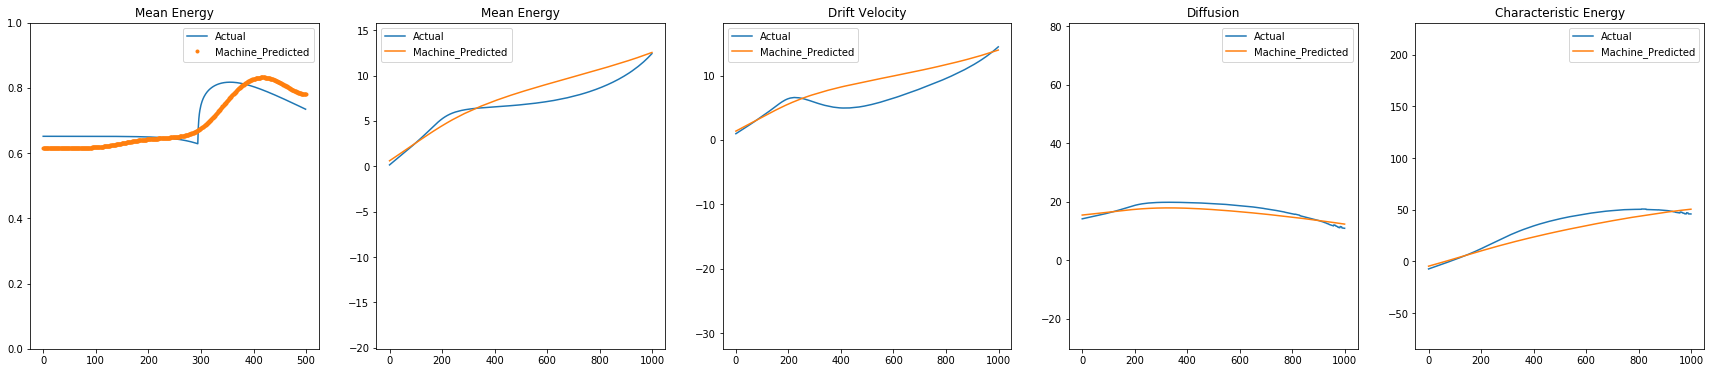

|(1000, 4)


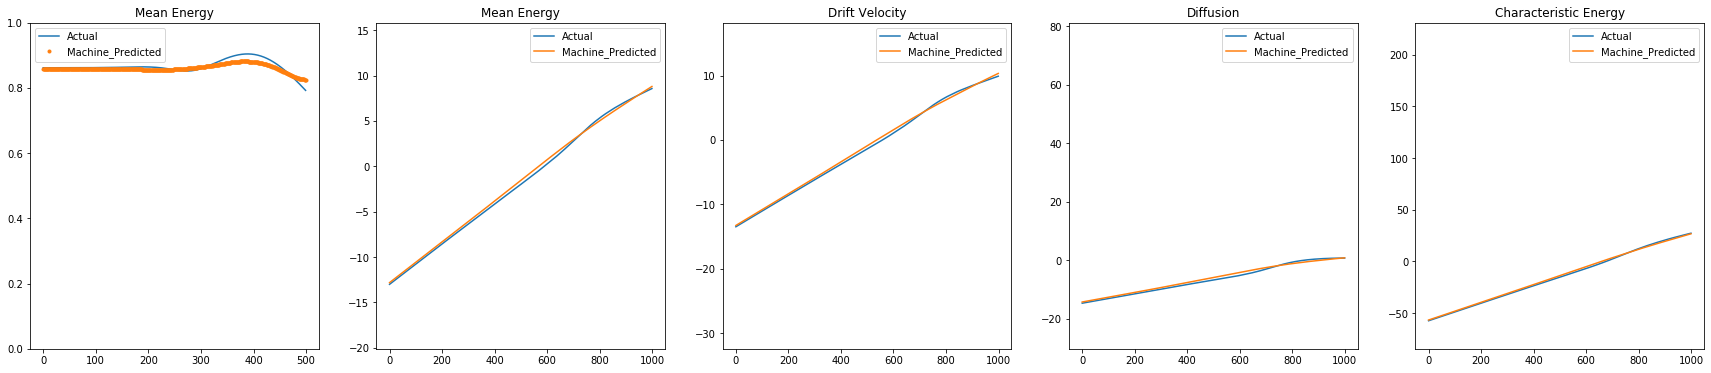

|(1000, 4)


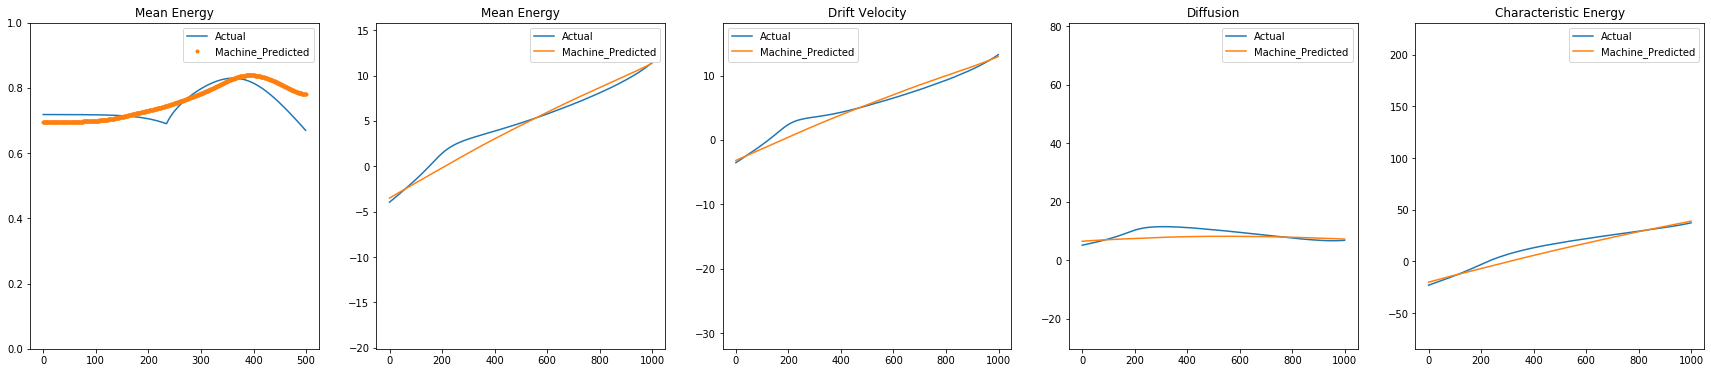

|(1000, 4)


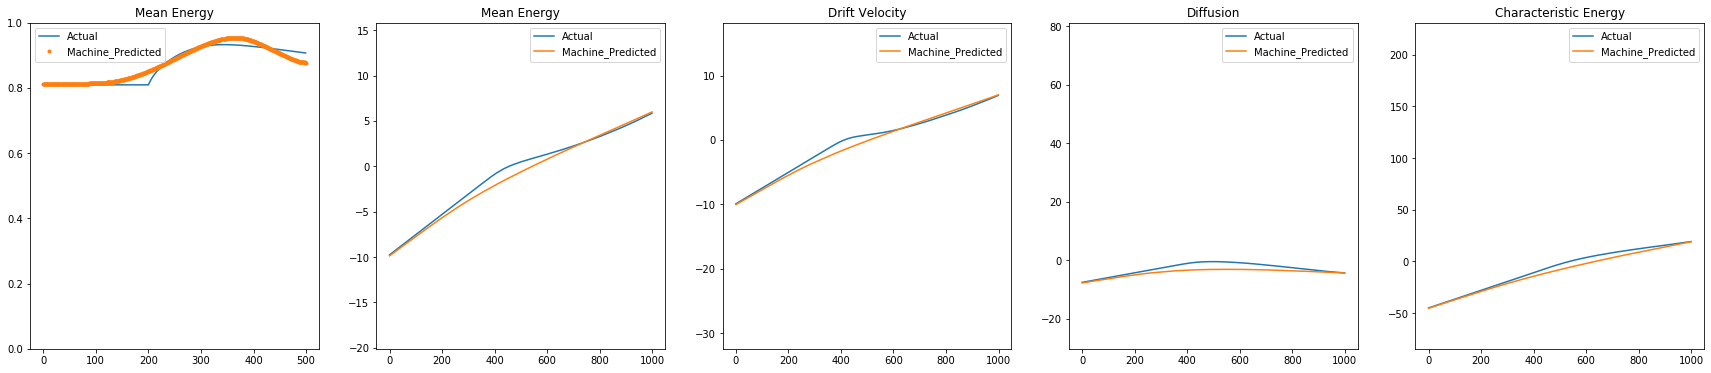

|(1000, 4)


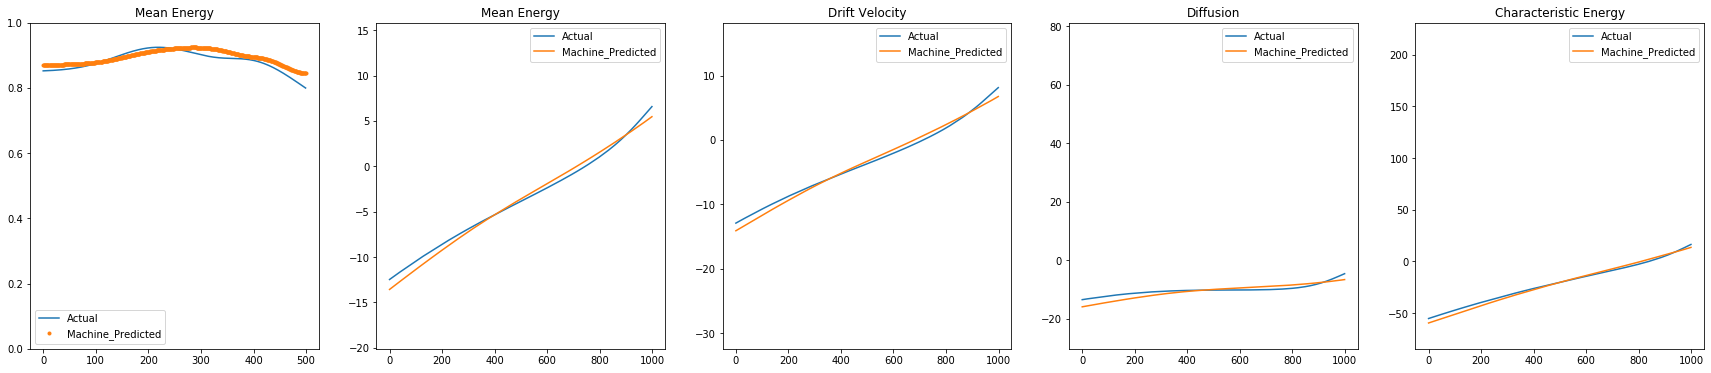

|(1000, 4)


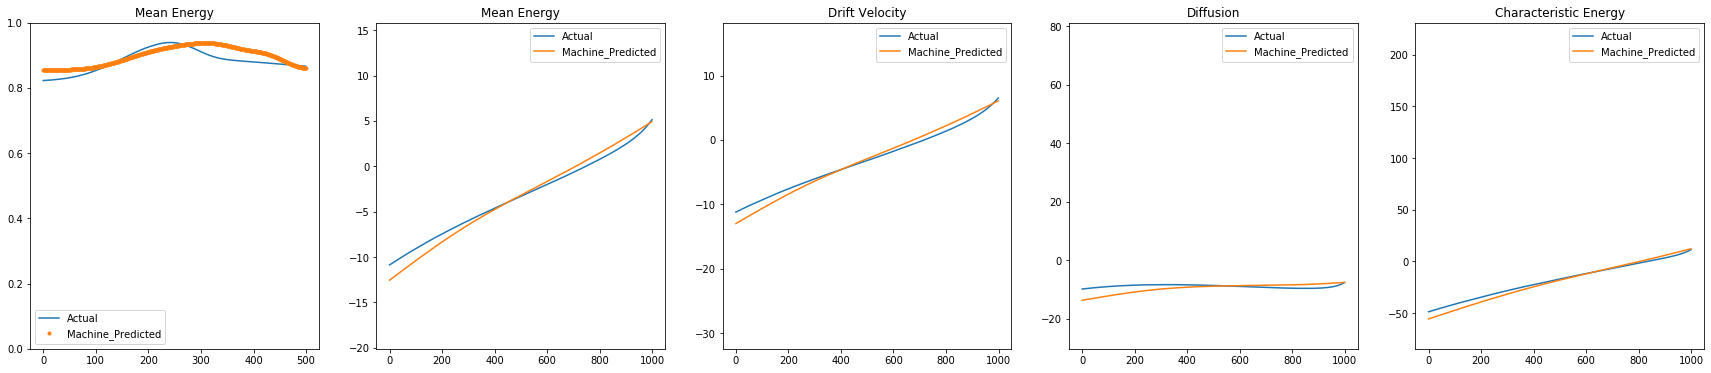

|(1000, 4)


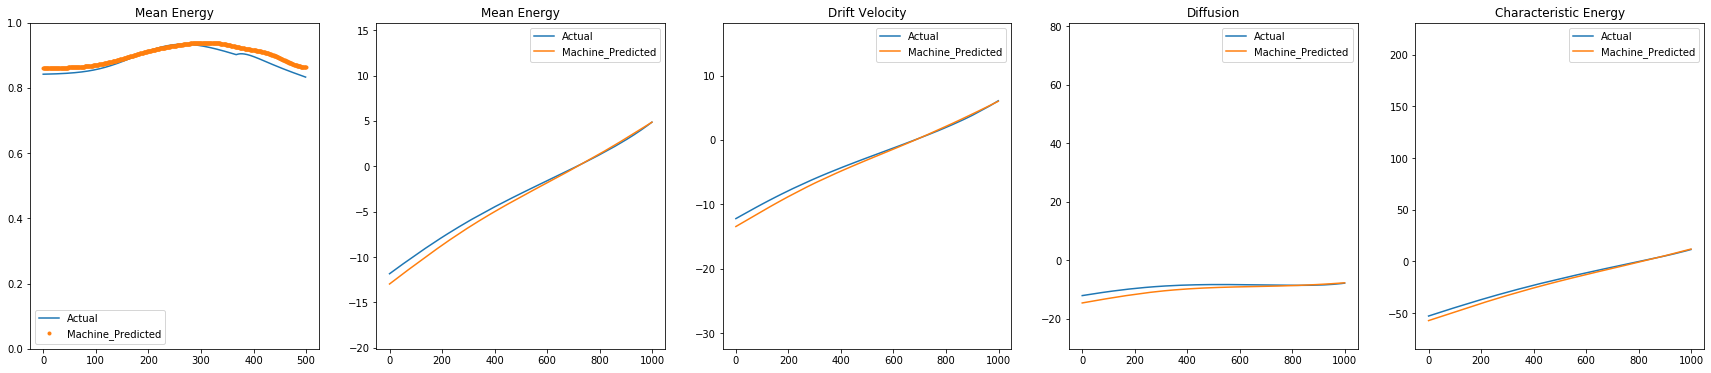

|(1000, 4)


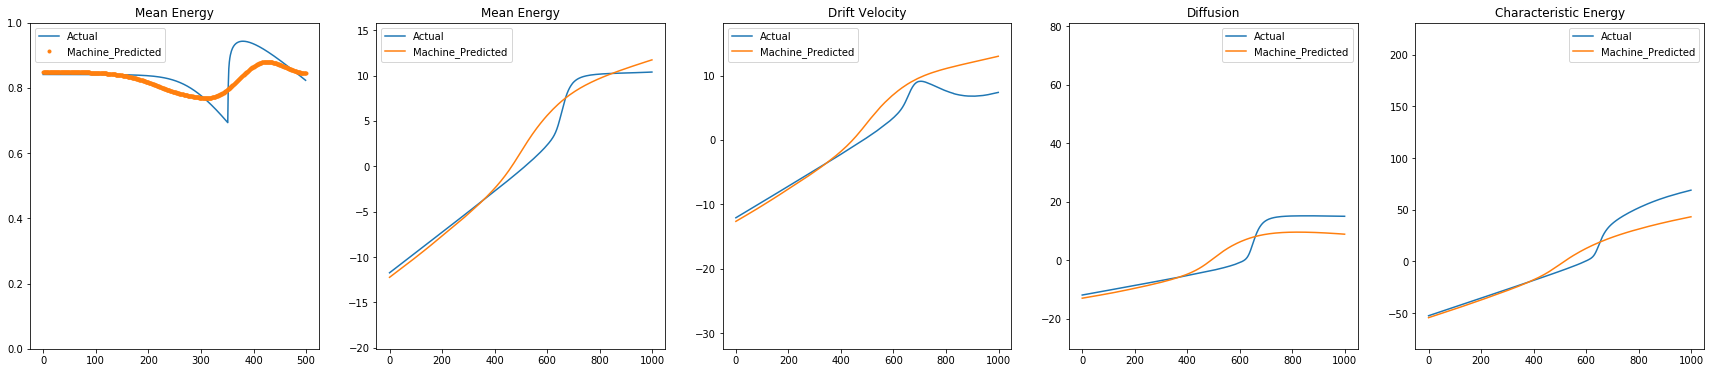

|(1000, 4)


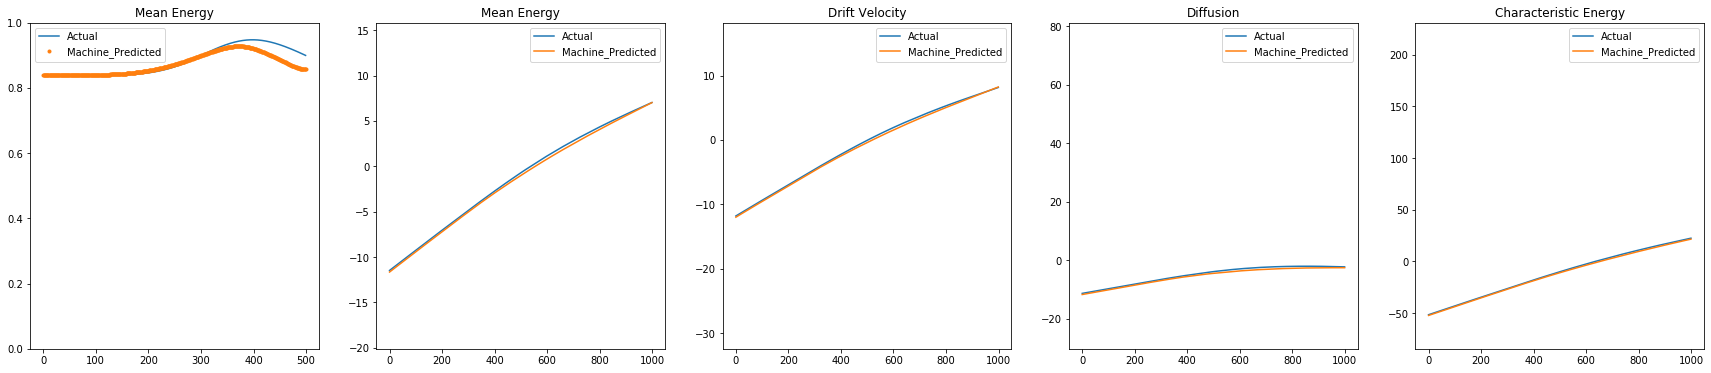

|(1000, 4)


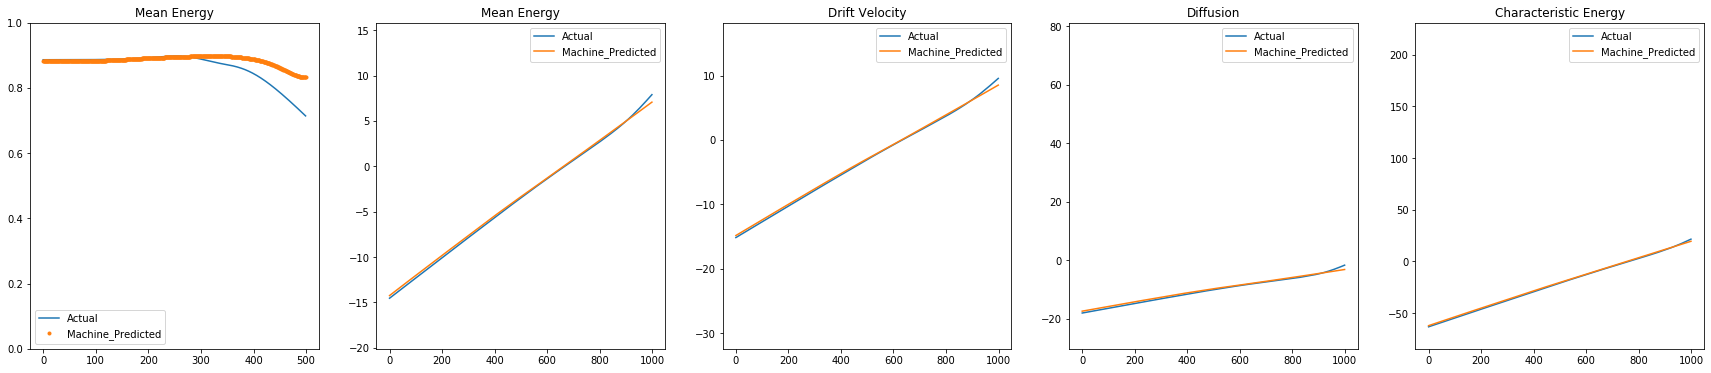

|(1000, 4)


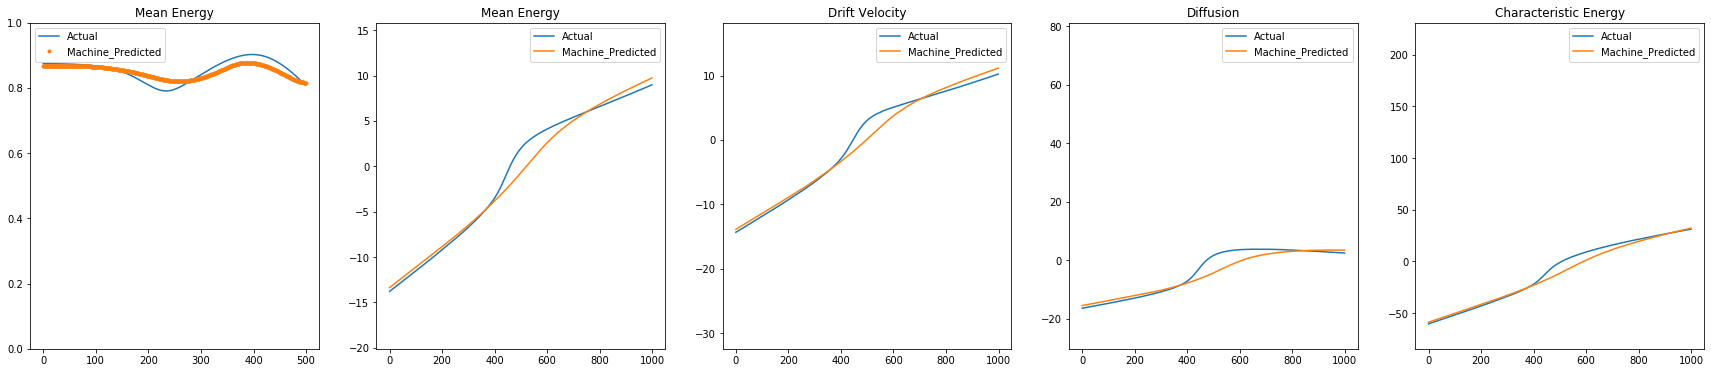

|(1000, 4)


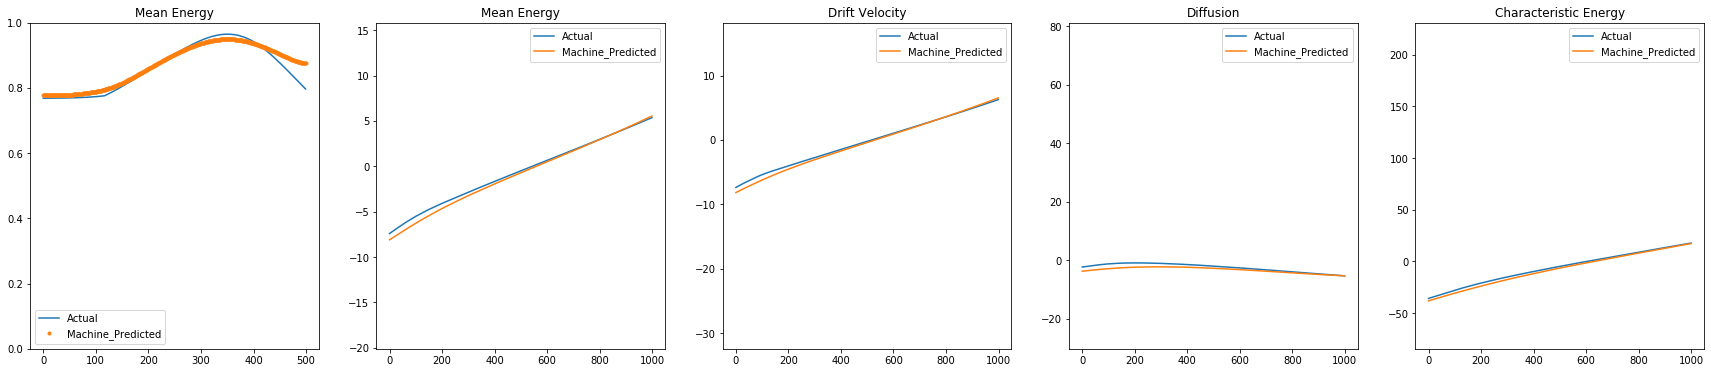

|(1000, 4)


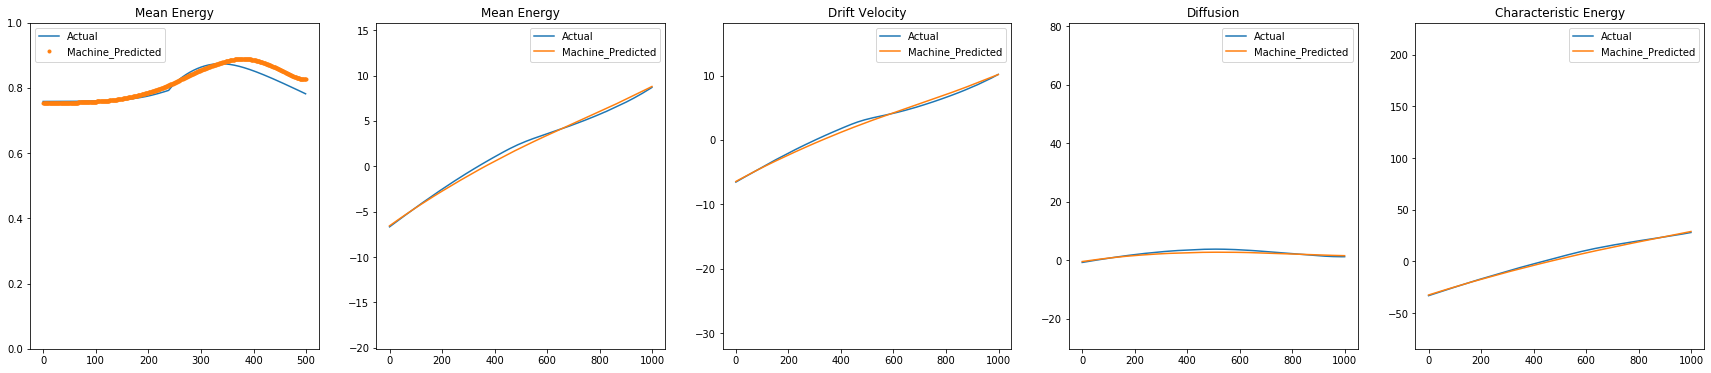

|(1000, 4)


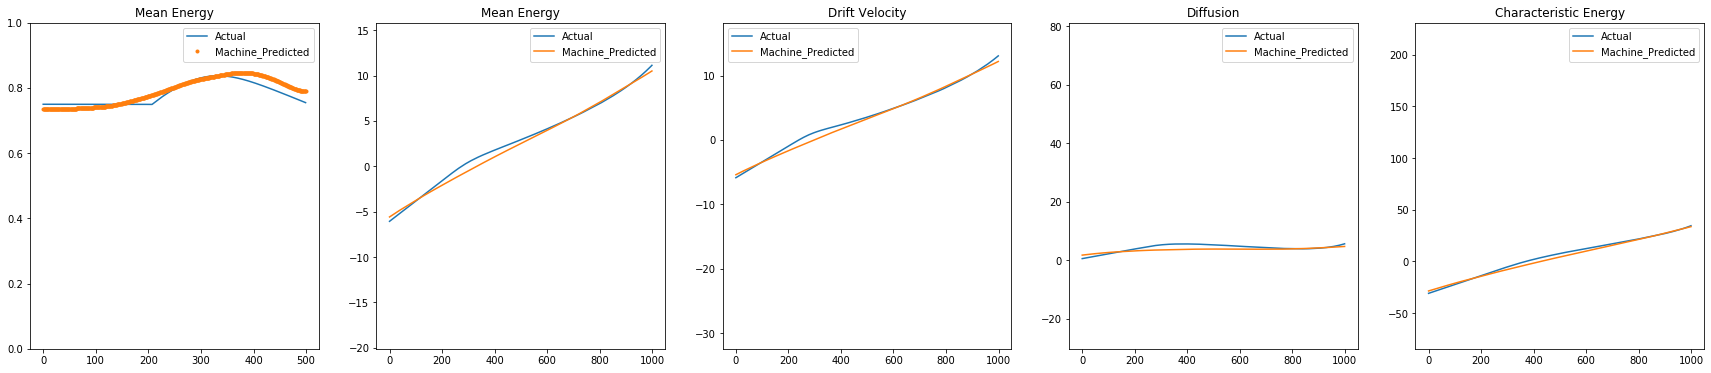

|(1000, 4)


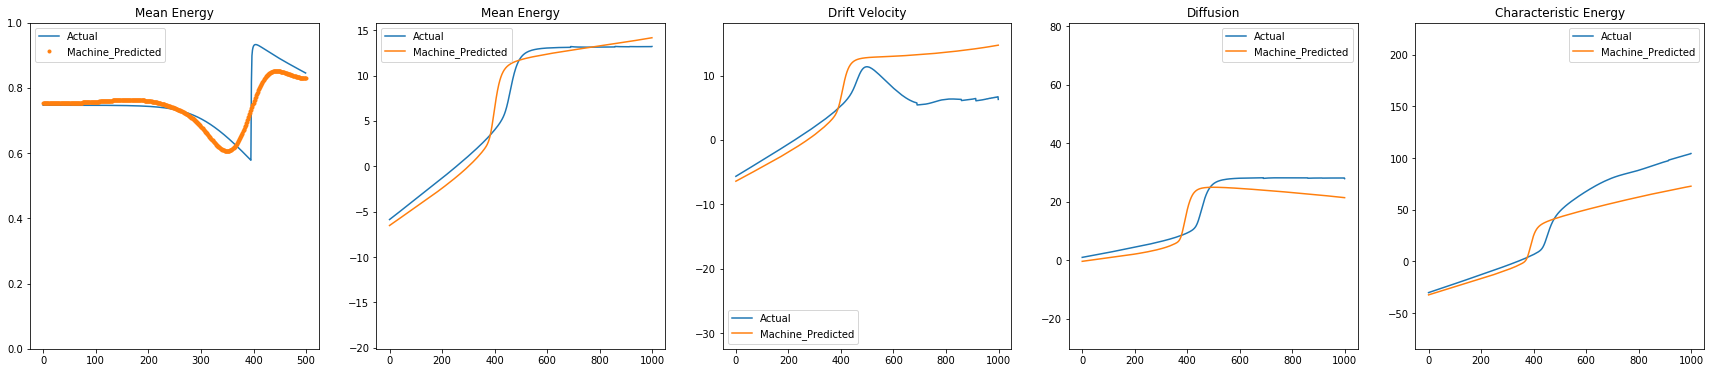

|(1000, 4)


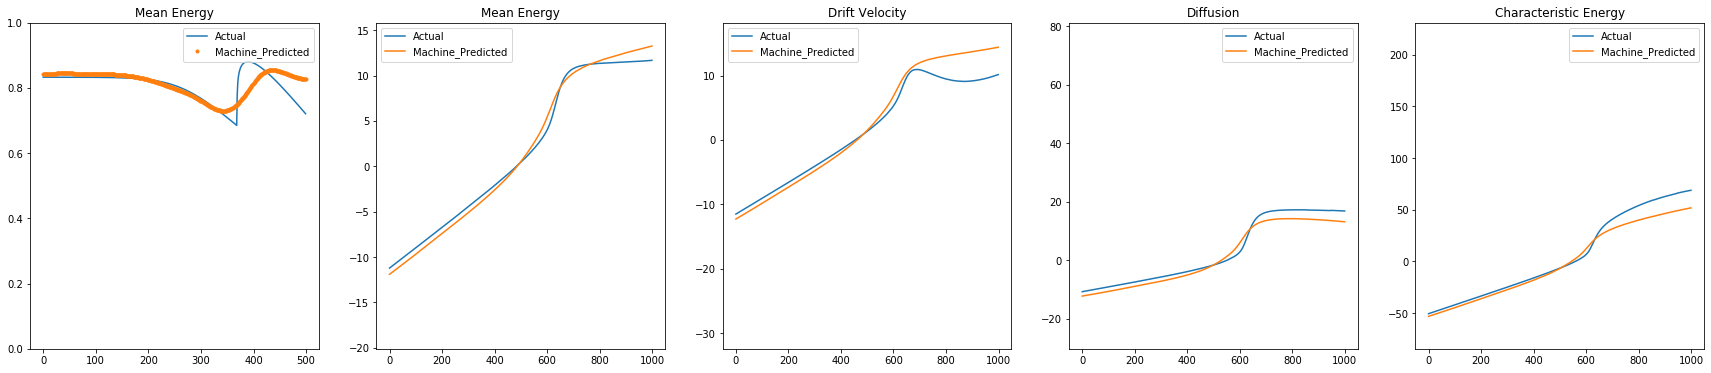

|(1000, 4)


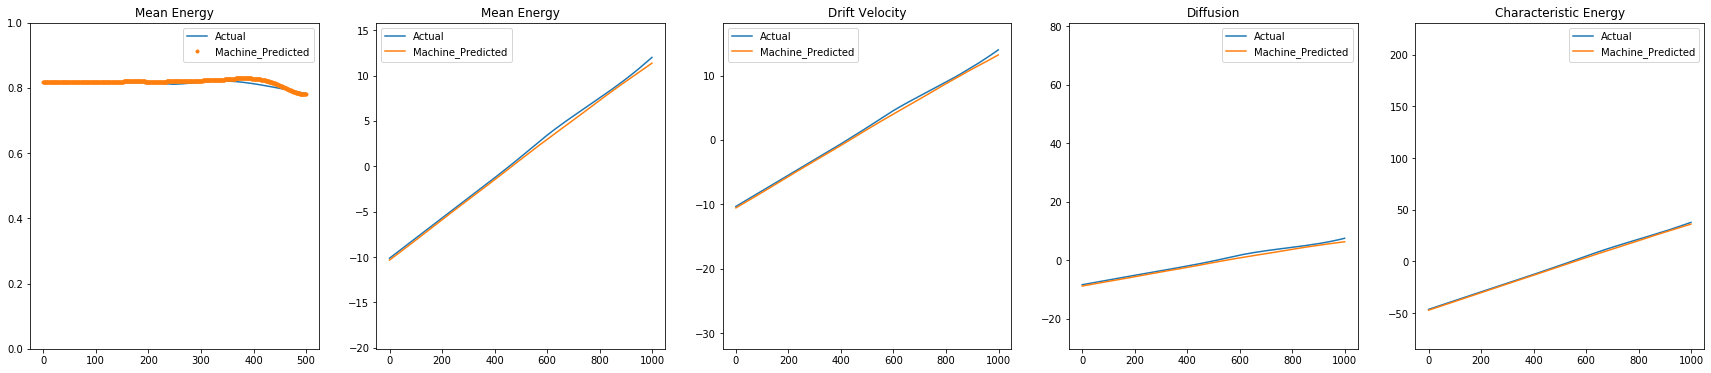

|(1000, 4)


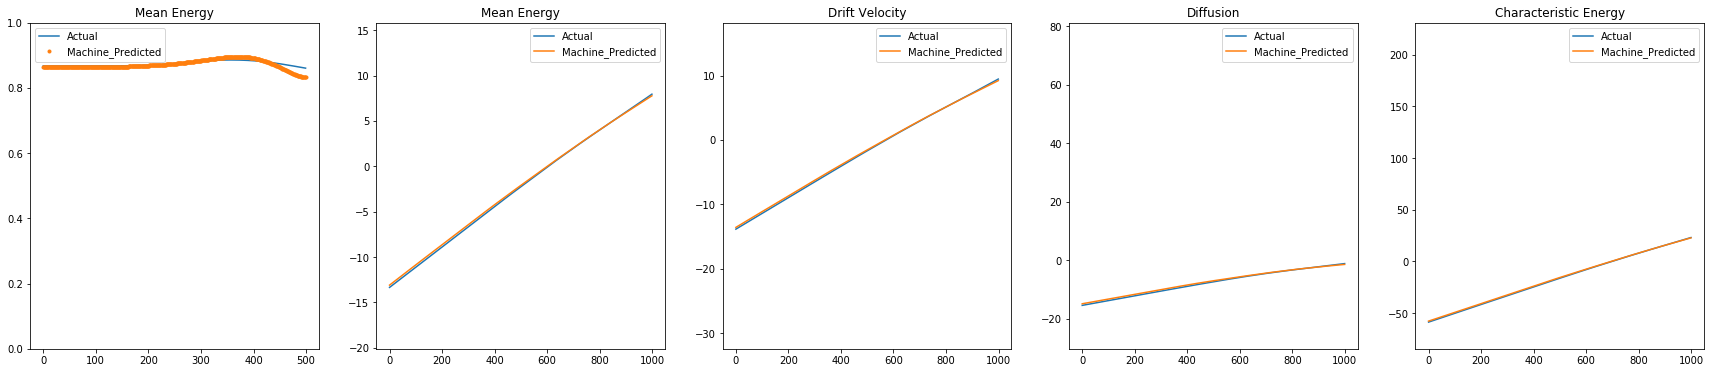

|(1000, 4)


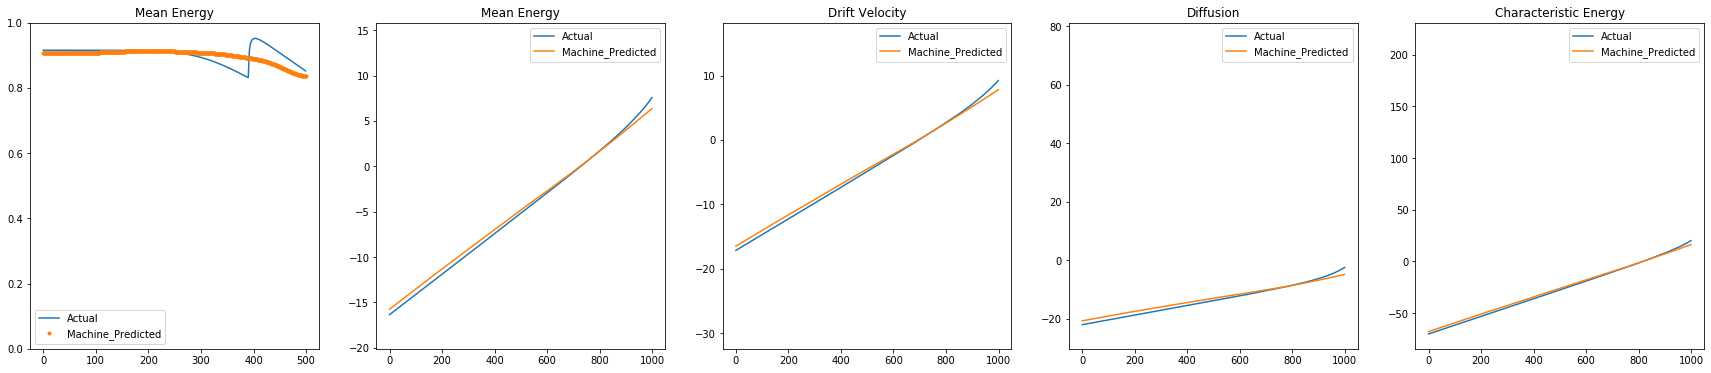

|(1000, 4)


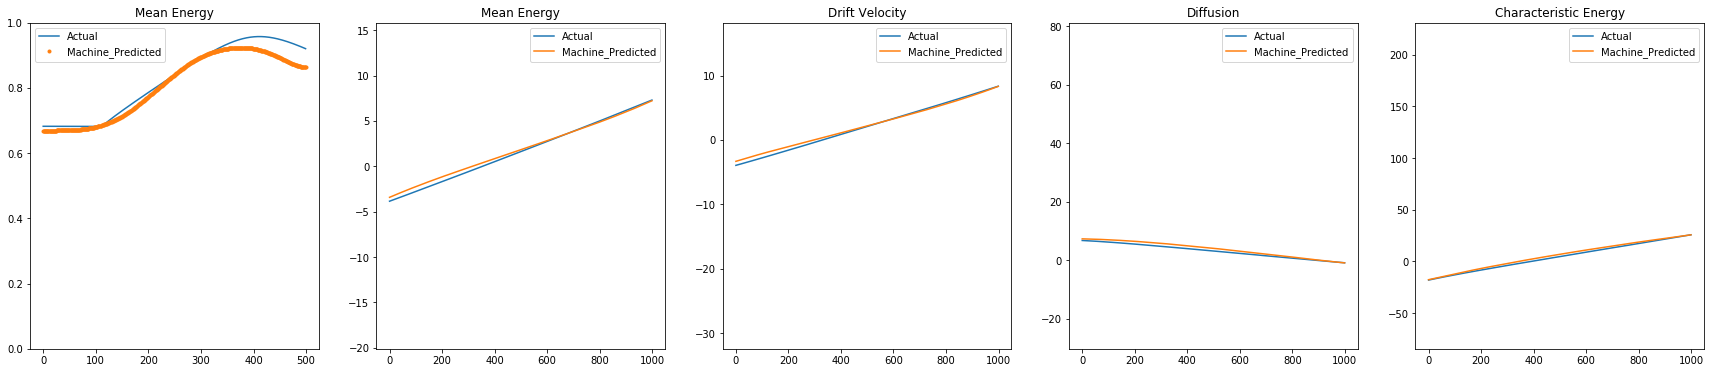

|(1000, 4)


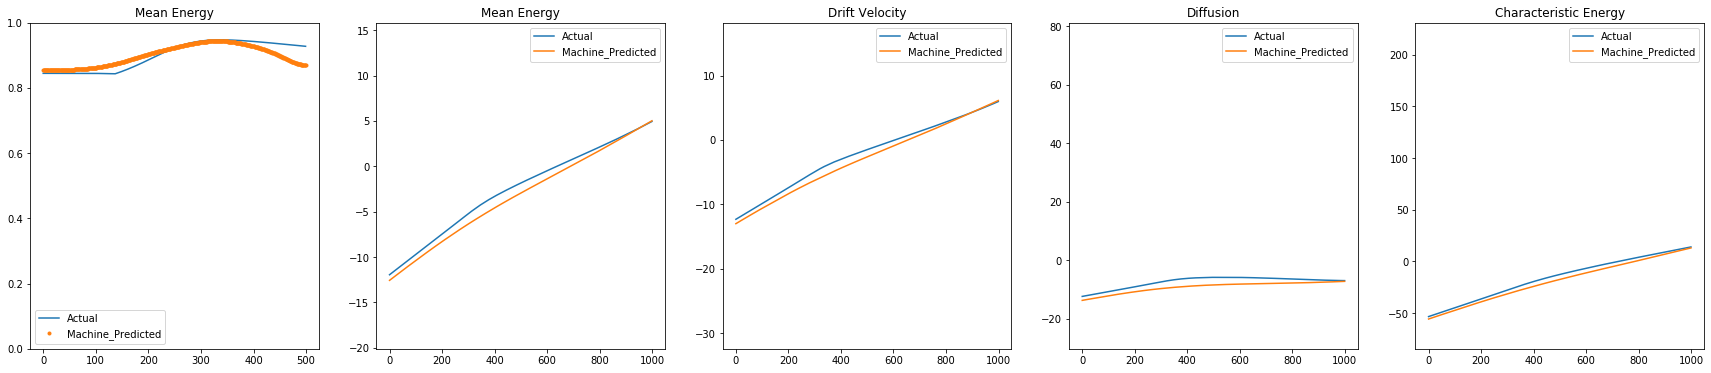

|(1000, 4)


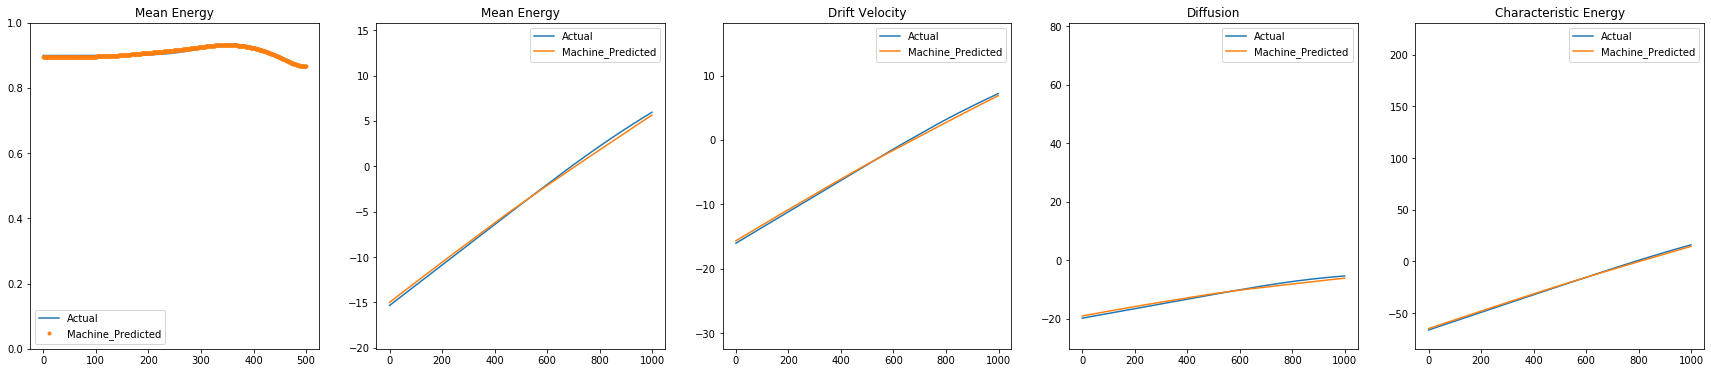

|(1000, 4)


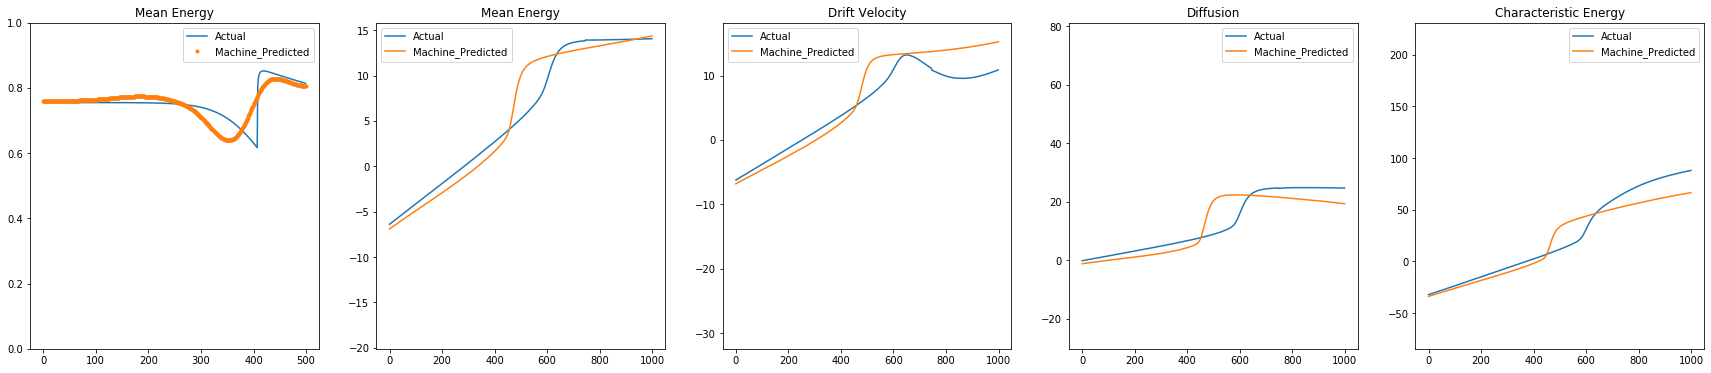

|(1000, 4)


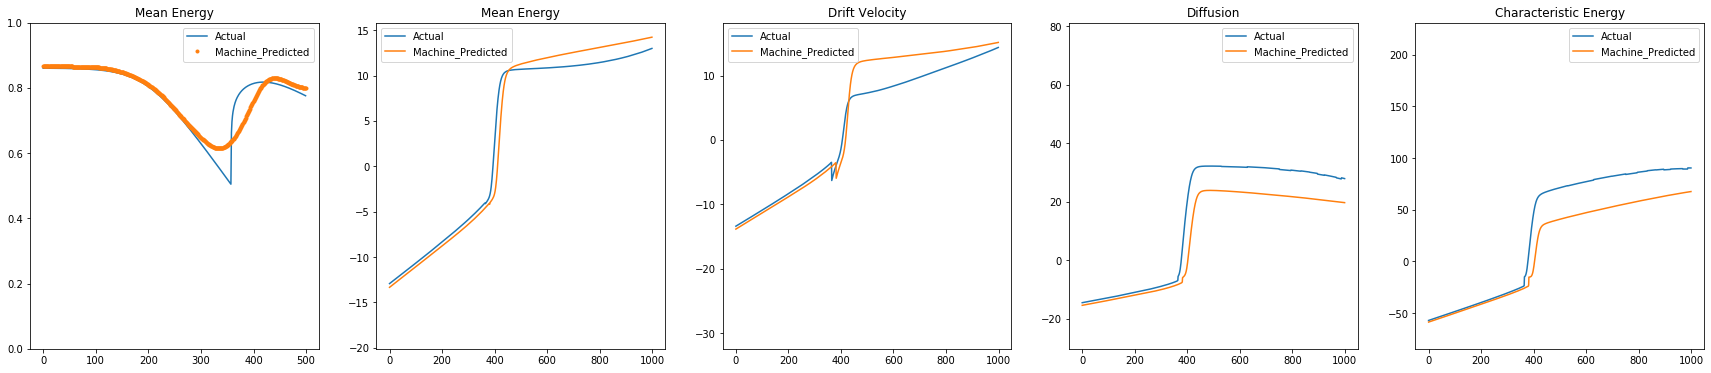

|(1000, 4)


|(1000, 4)


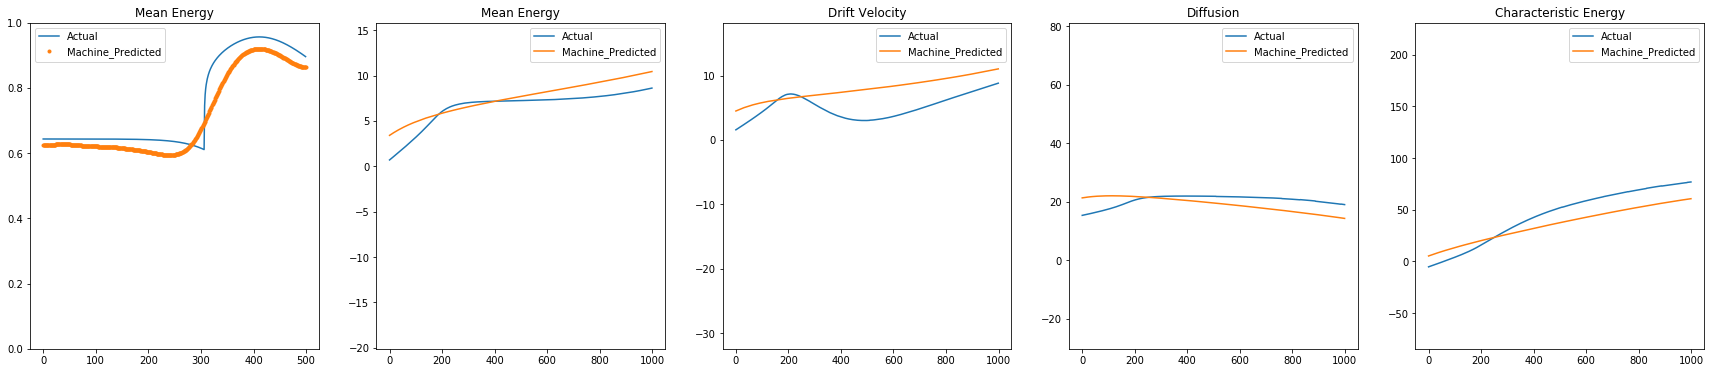

|(1000, 4)


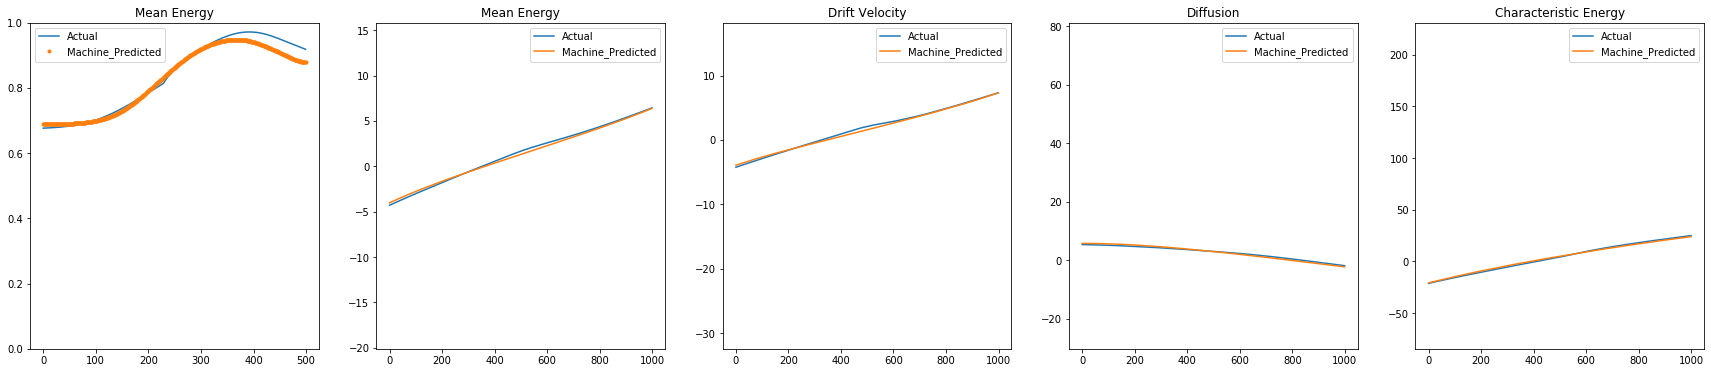

|(1000, 4)


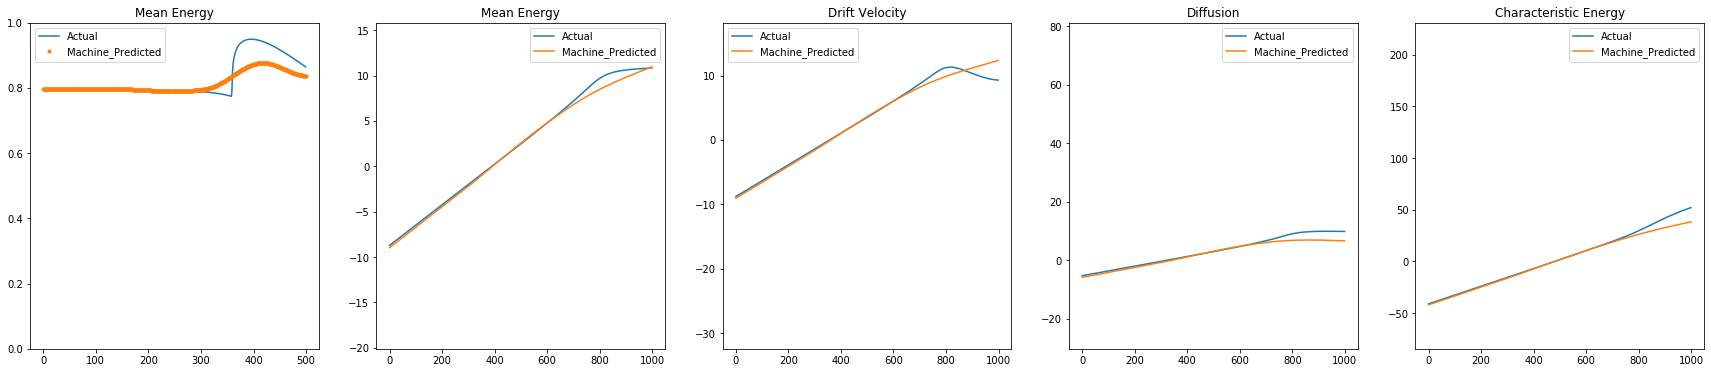

|(1000, 4)


|(1000, 4)


|(1000, 4)


|(1000, 4)


|(1000, 4)


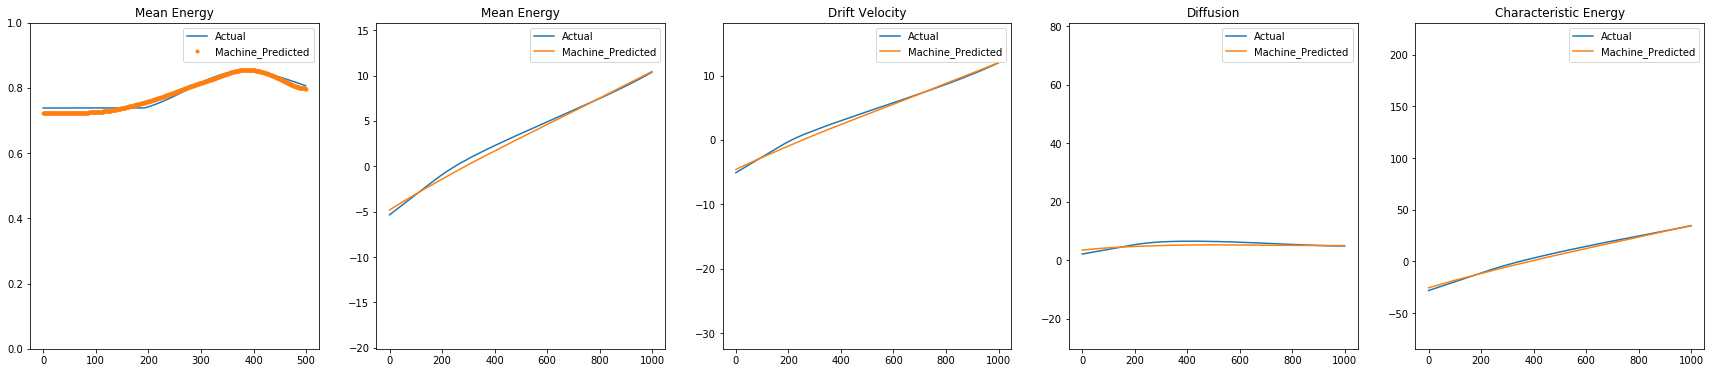

|(1000, 4)


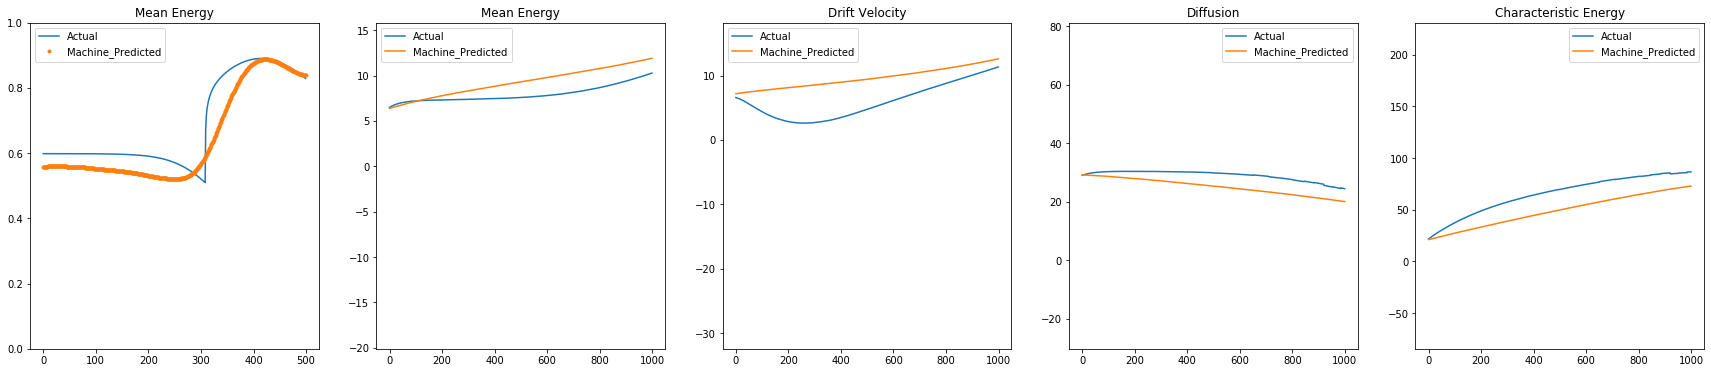

|(1000, 4)


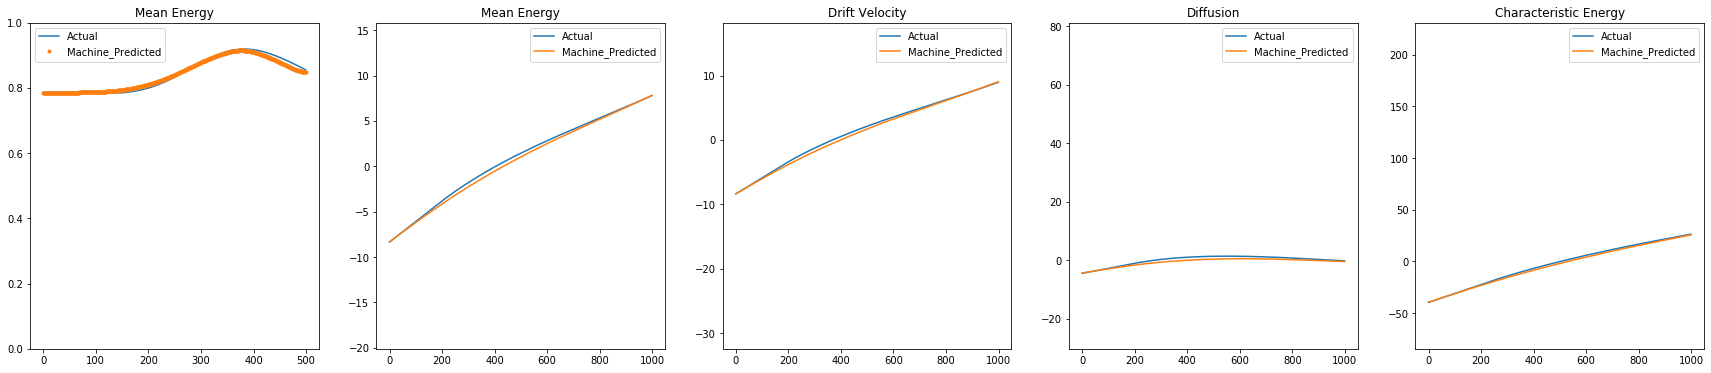

|(1000, 4)


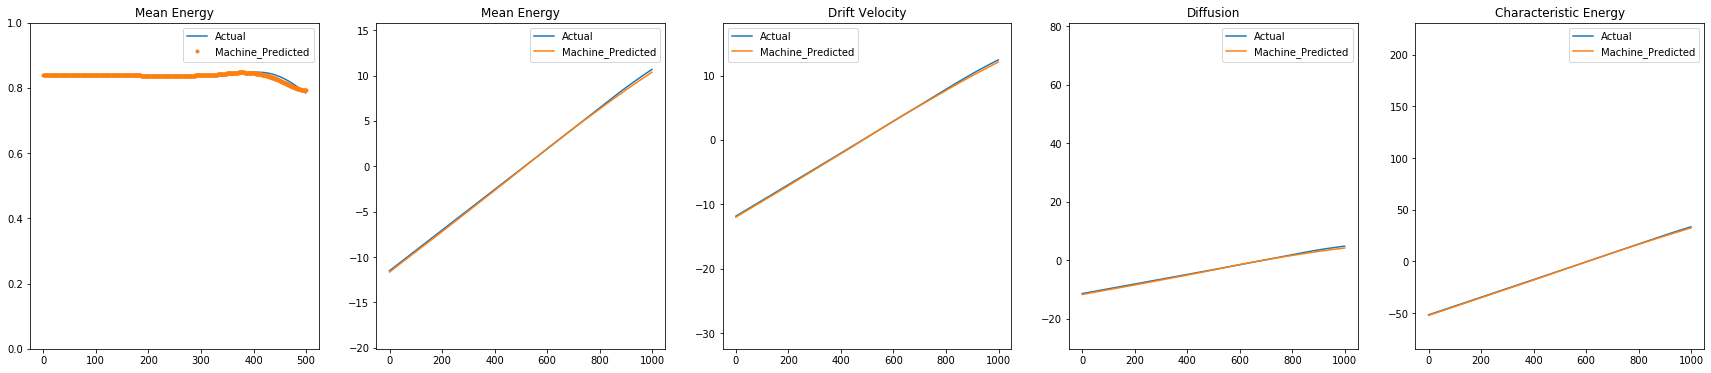

|(1000, 4)


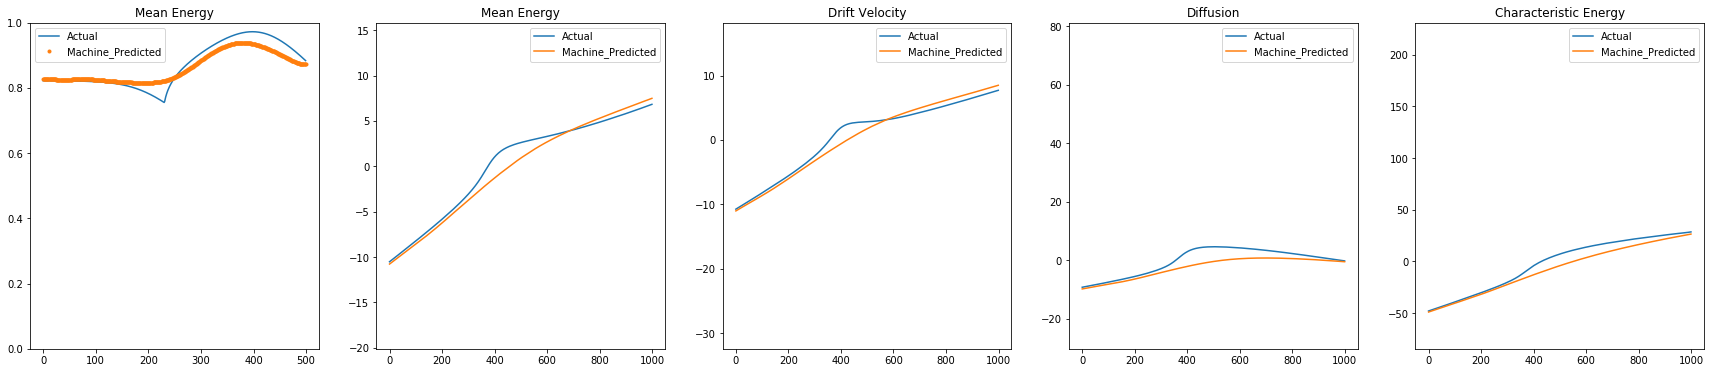

|(1000, 4)


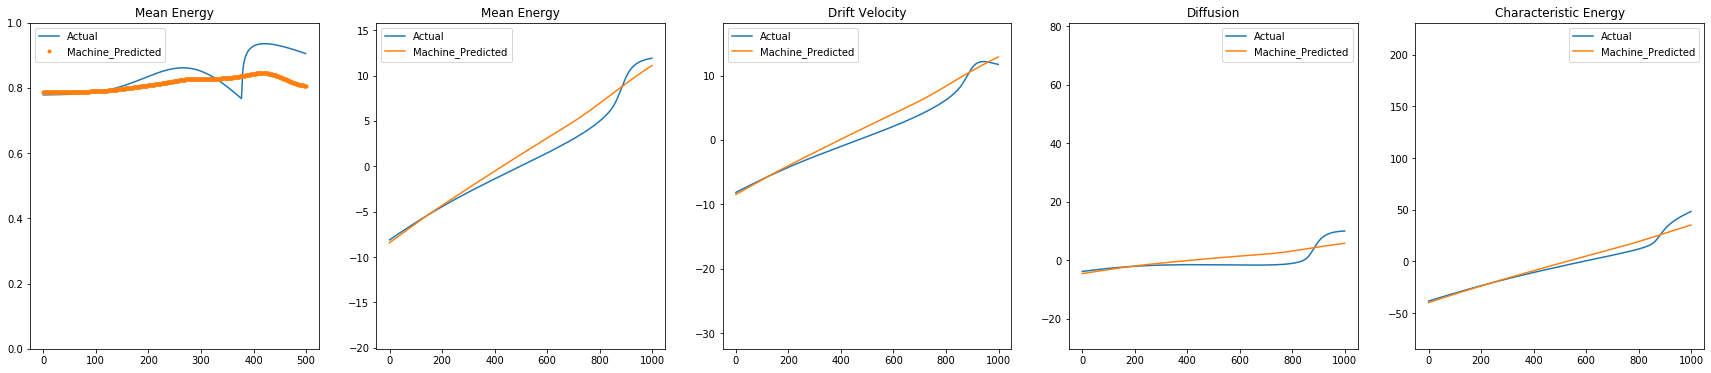

|(1000, 4)


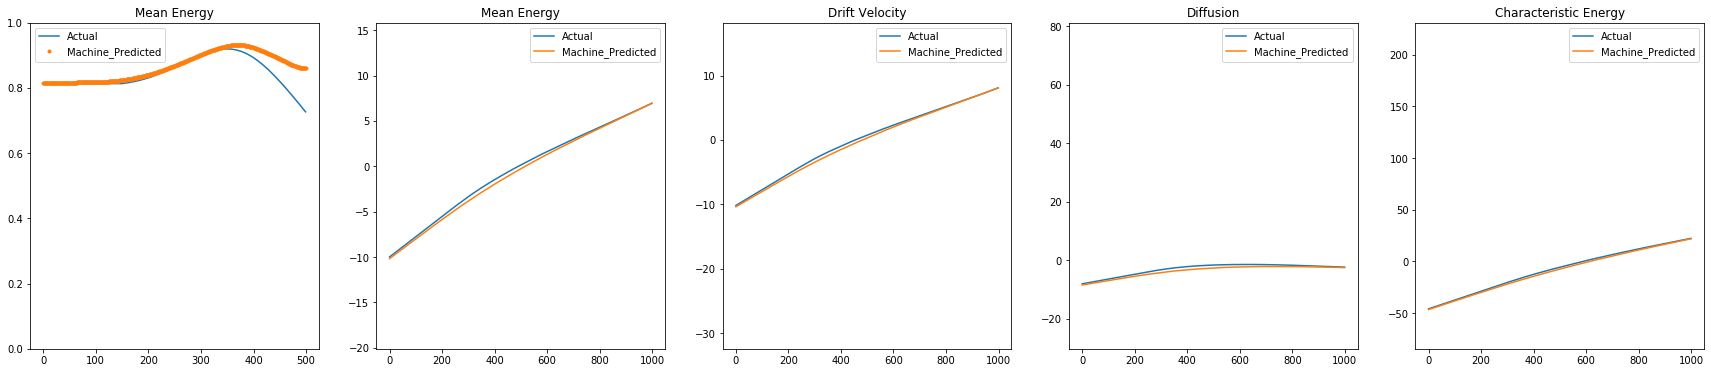

|(1000, 4)


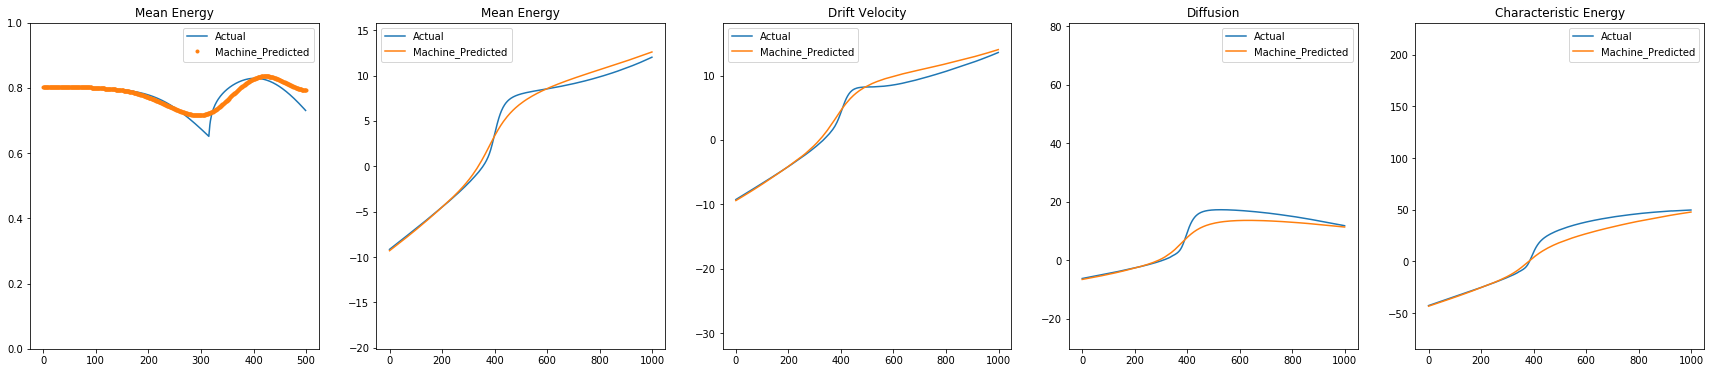

|(1000, 4)


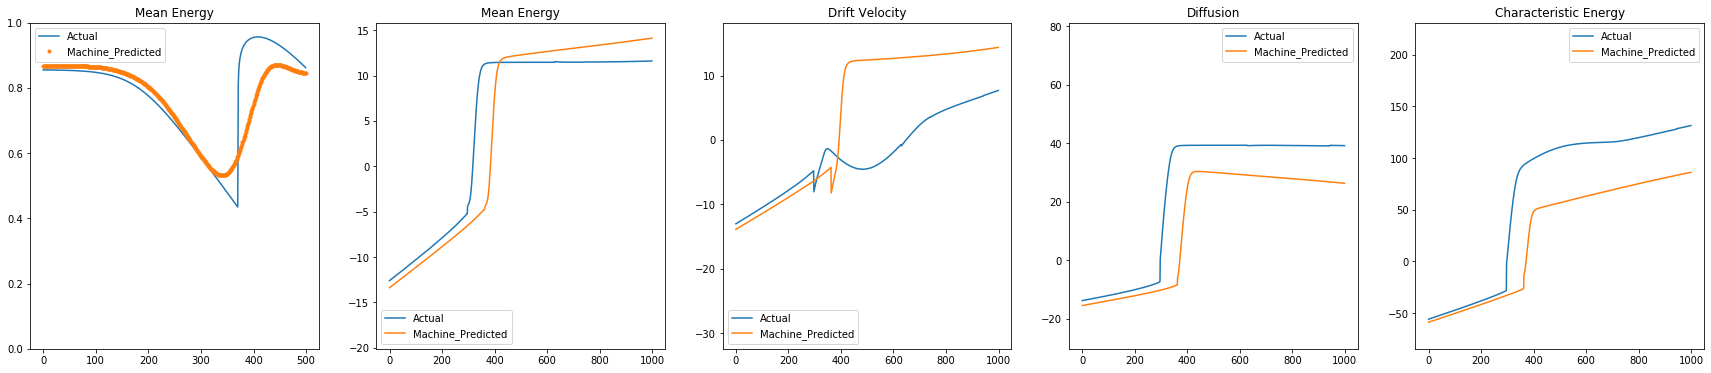

|(1000, 4)


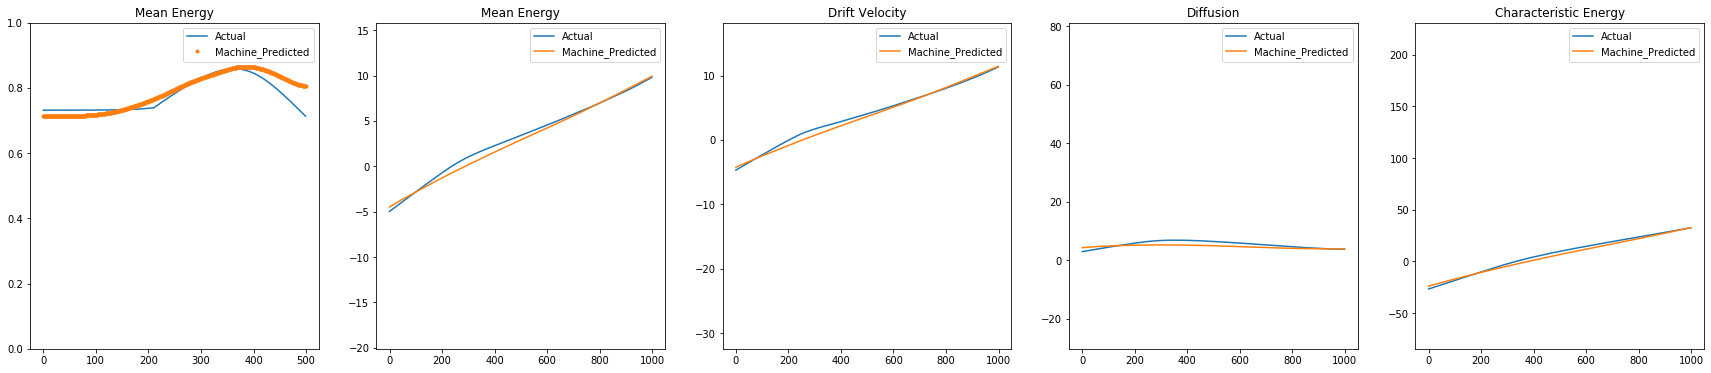

|(1000, 4)


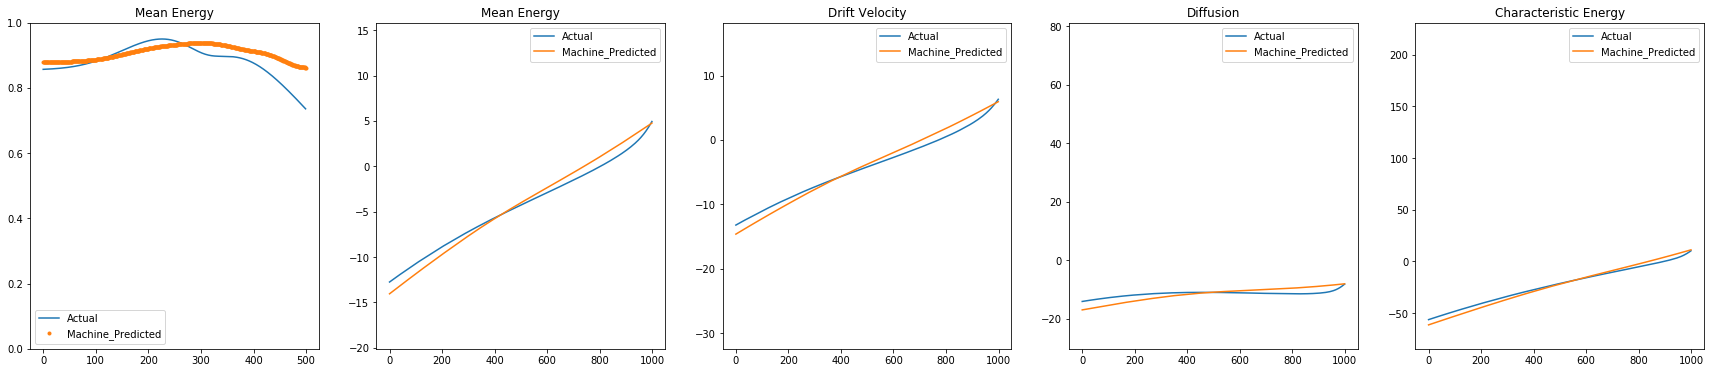

|(1000, 4)


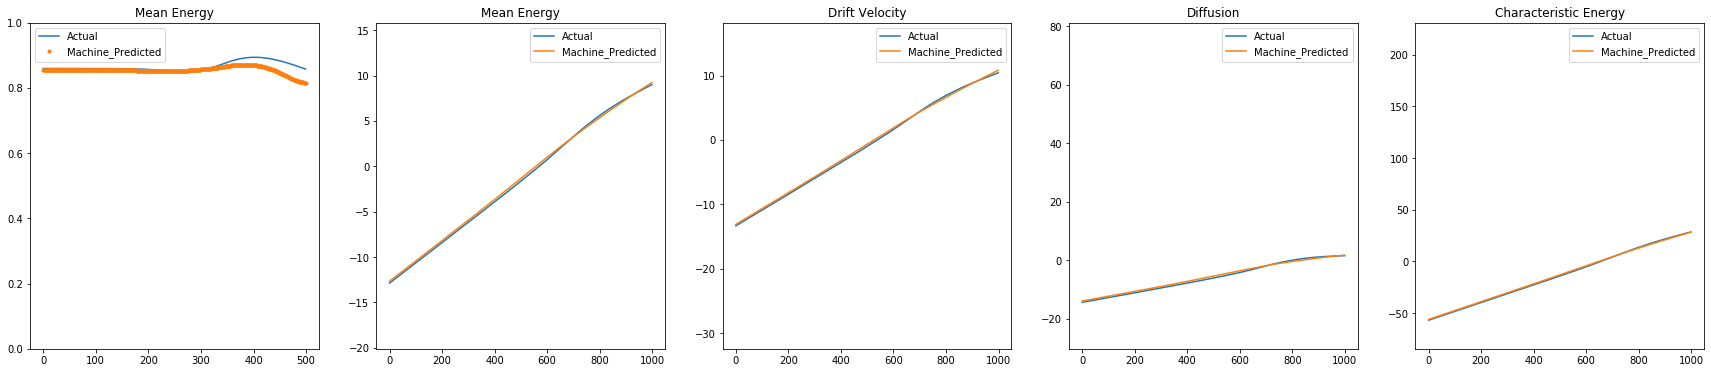

|(1000, 4)


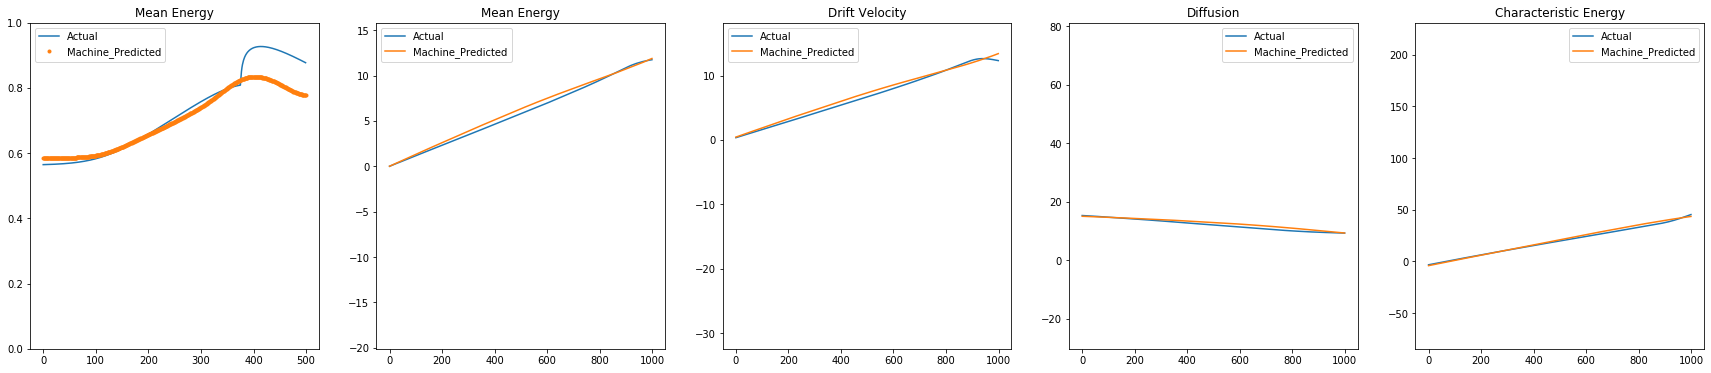

|(1000, 4)


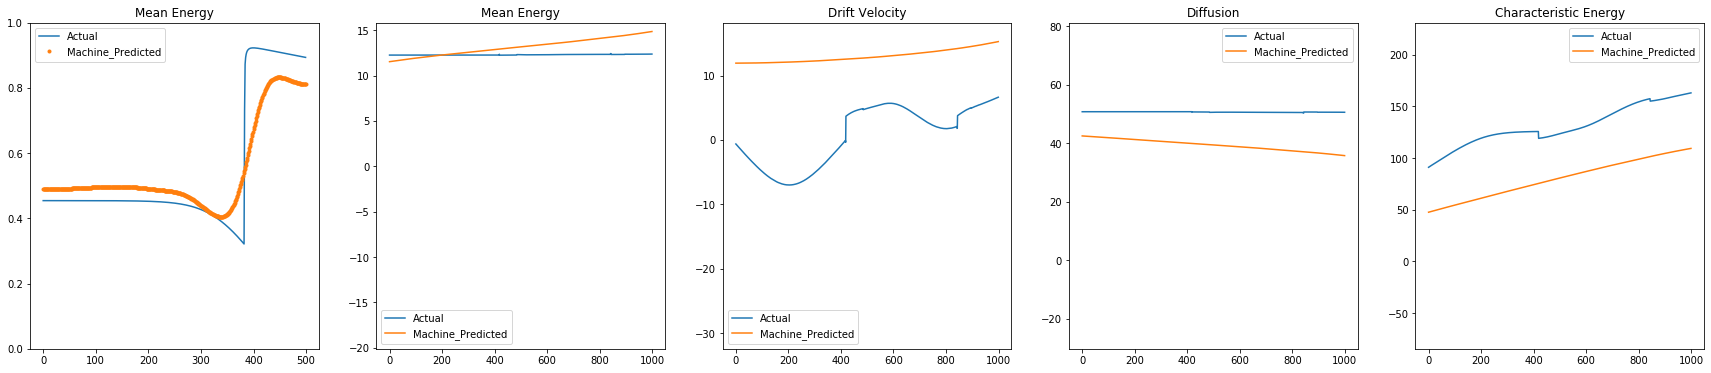

|(1000, 4)


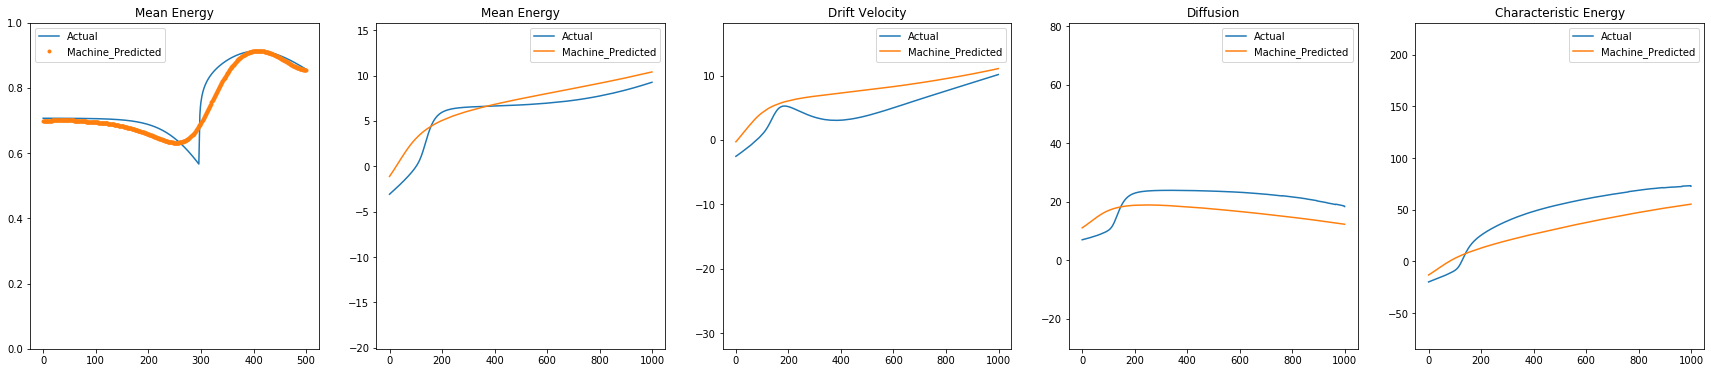

|(1000, 4)


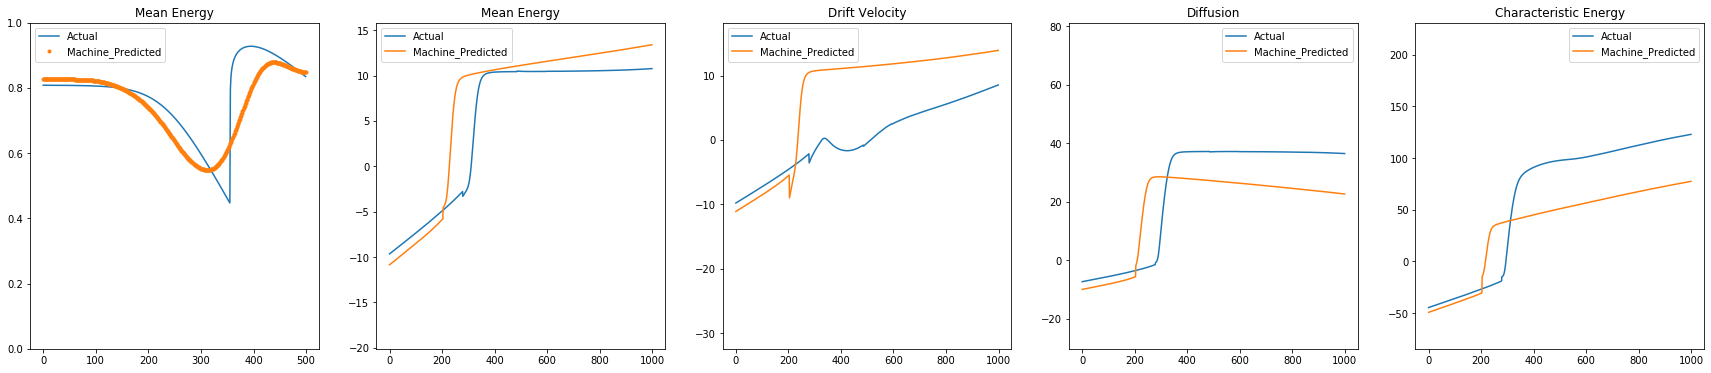

|(1000, 4)


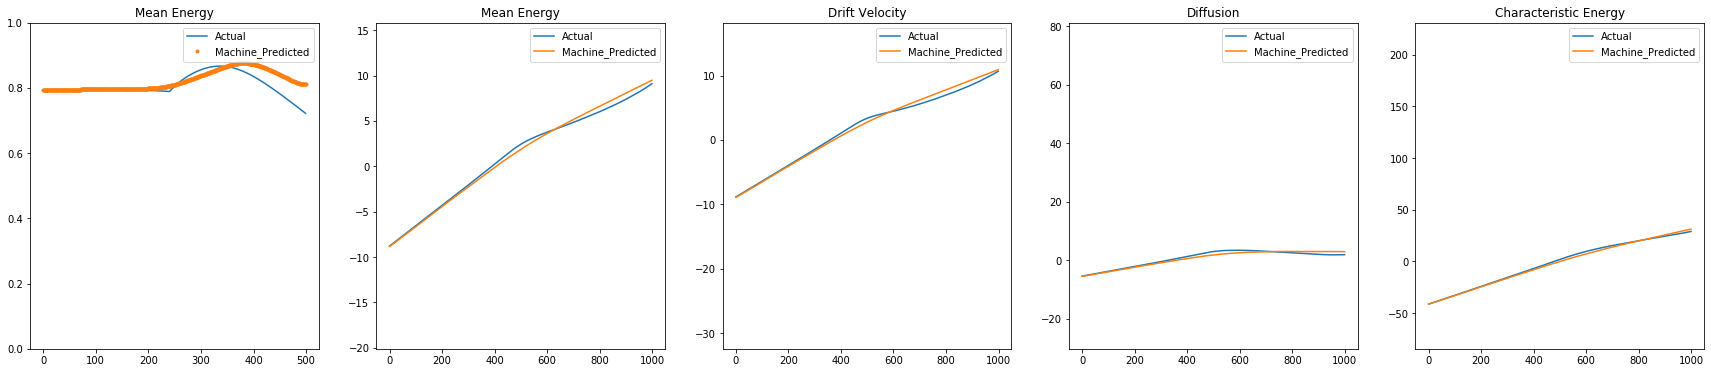

|(1000, 4)


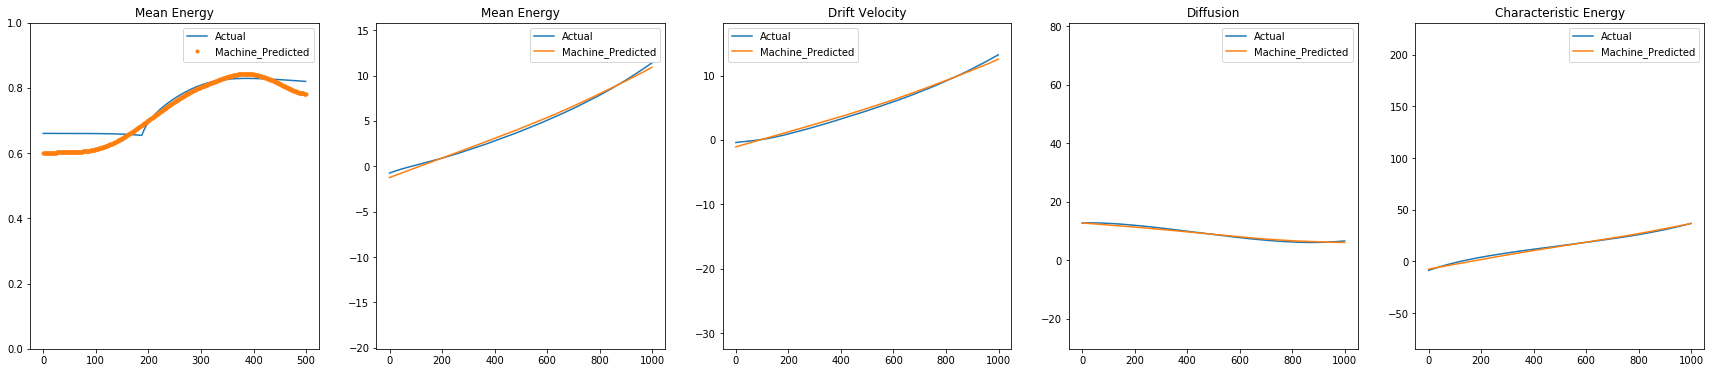

|(1000, 4)


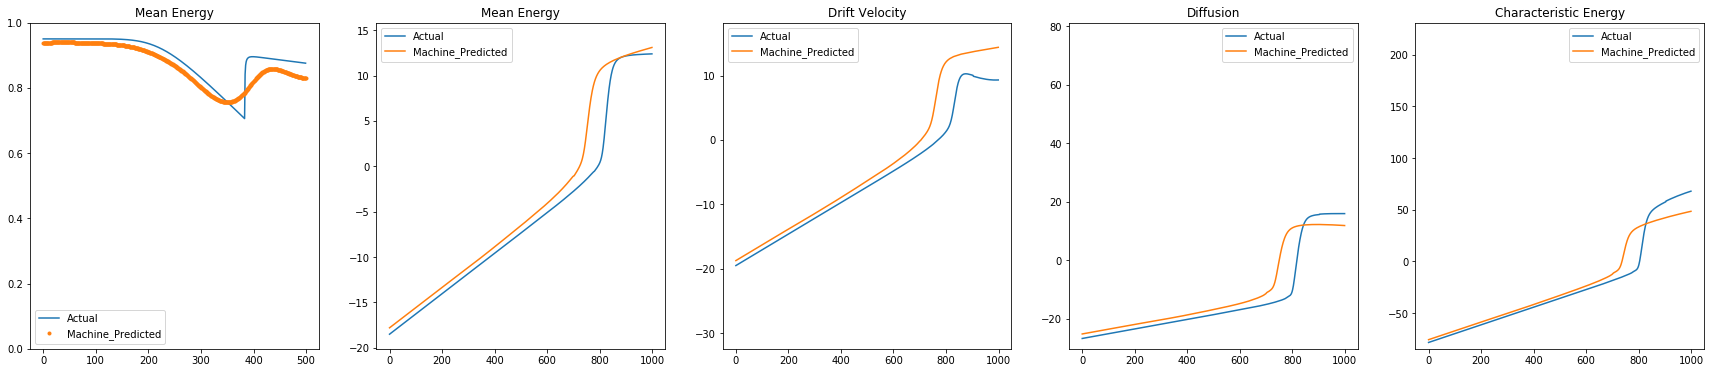

|(1000, 4)


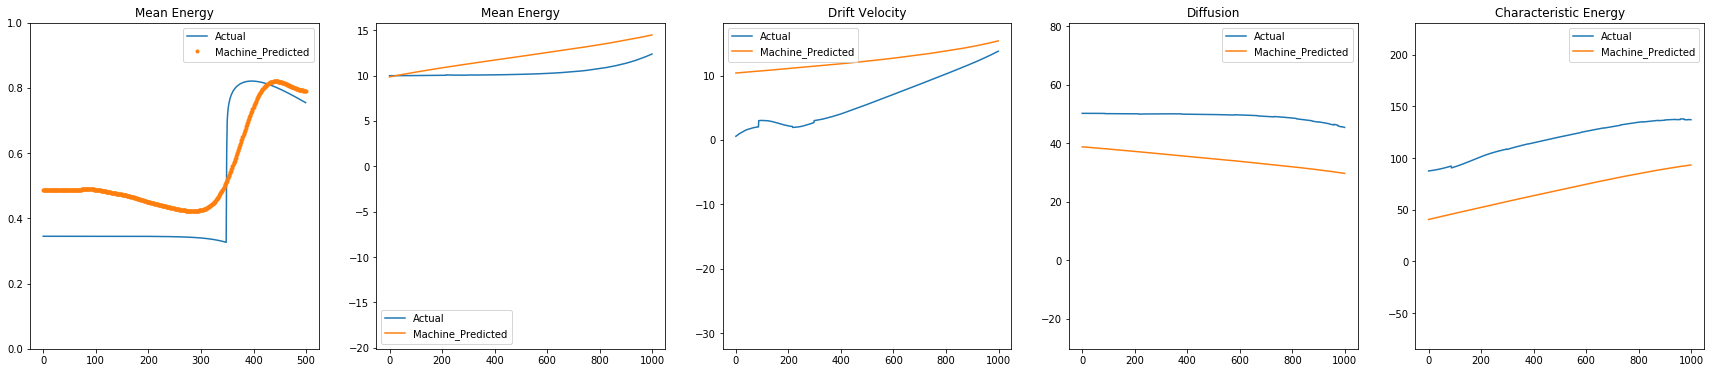

|(1000, 4)


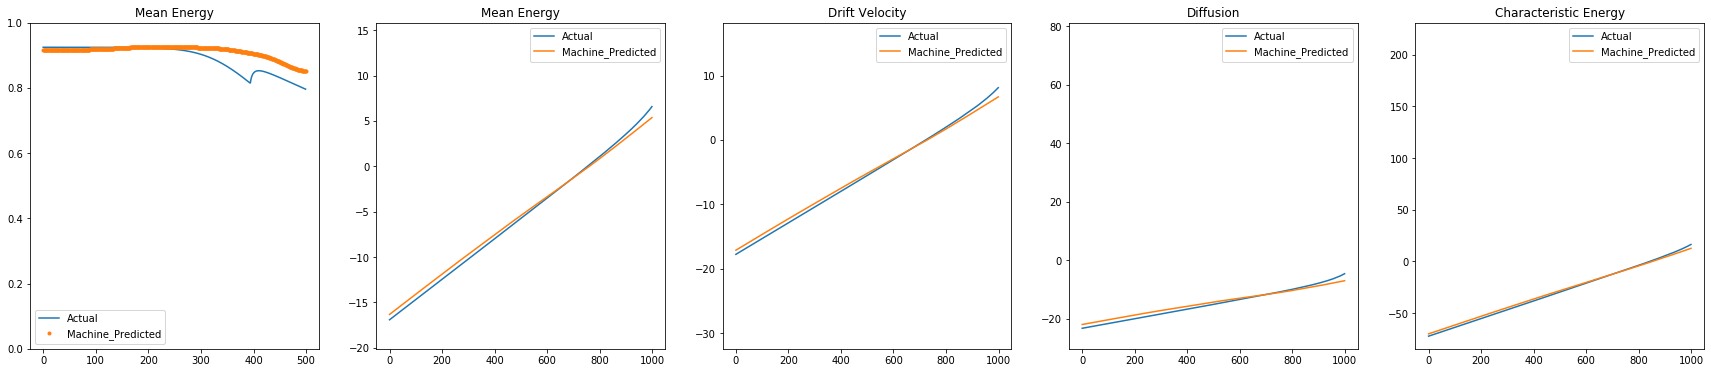

|(1000, 4)


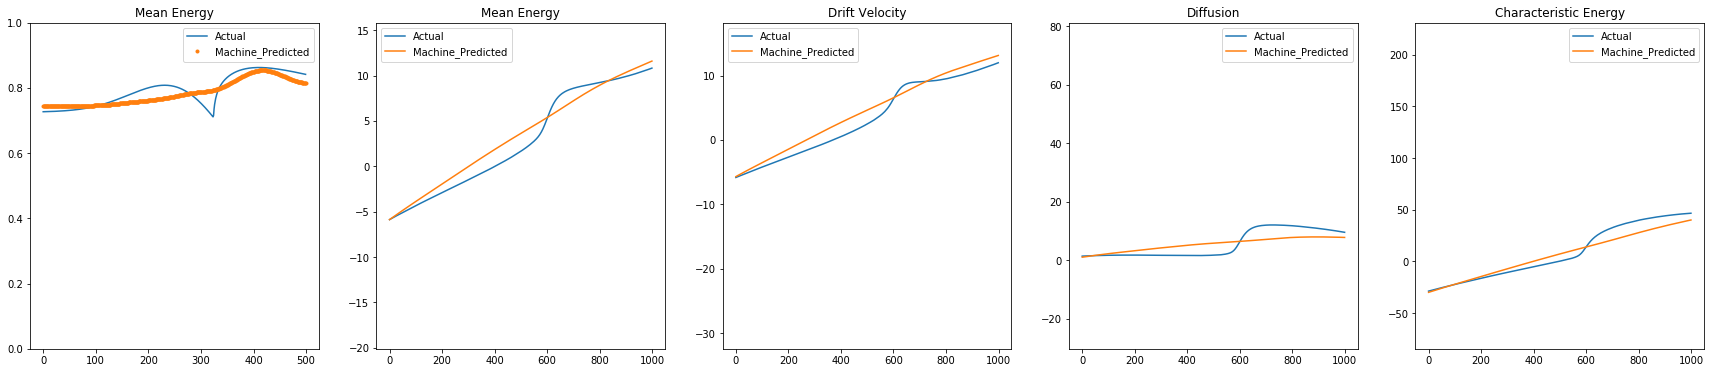

|(1000, 4)


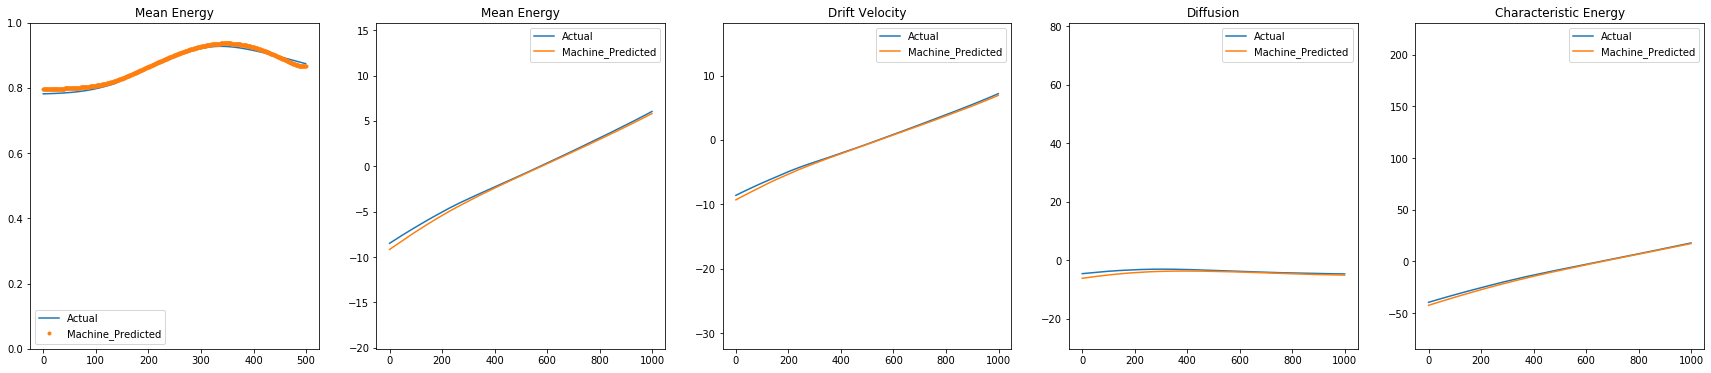

|(1000, 4)


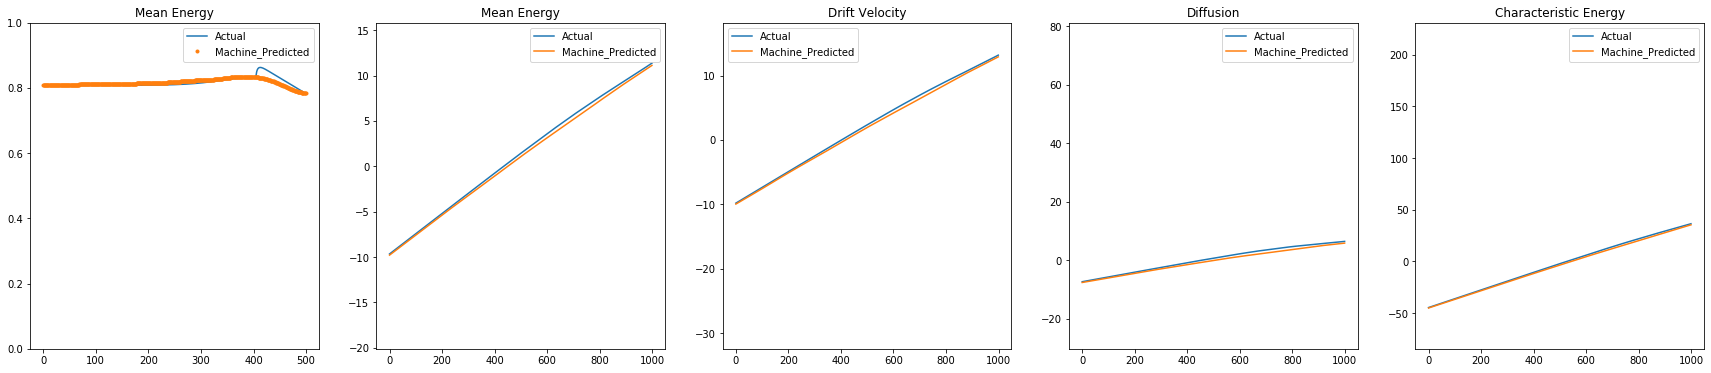

|(1000, 4)


|(1000, 4)


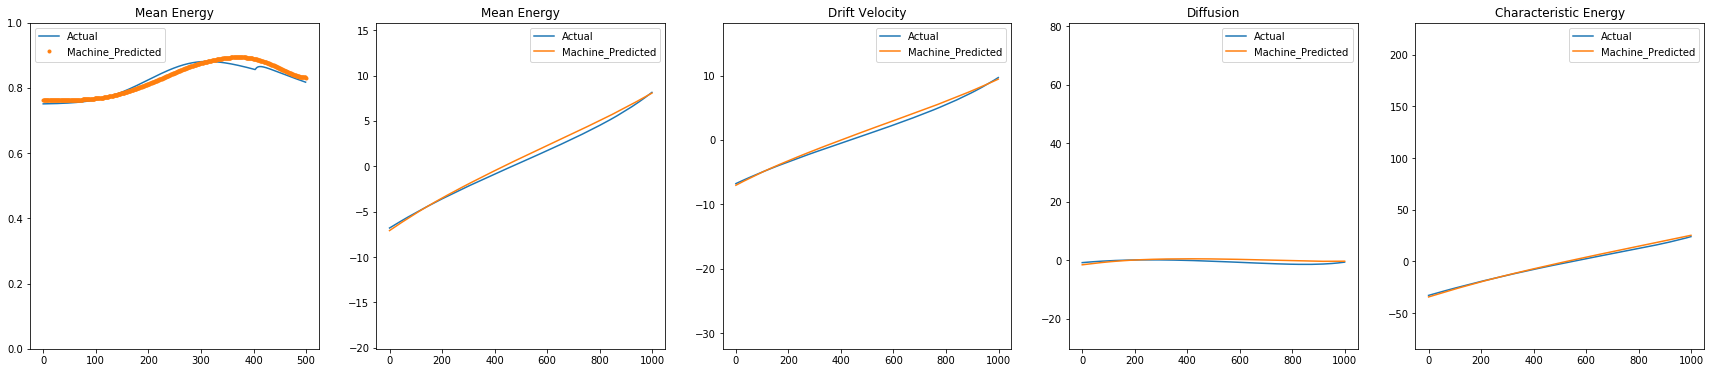

|(1000, 4)


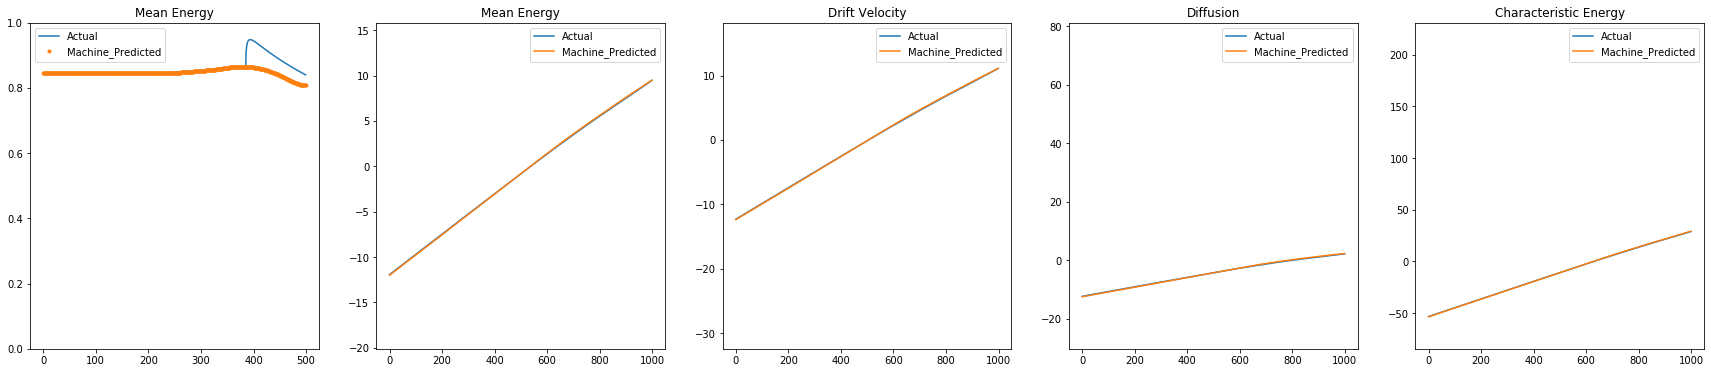

|(1000, 4)


|(1000, 4)


|(1000, 4)


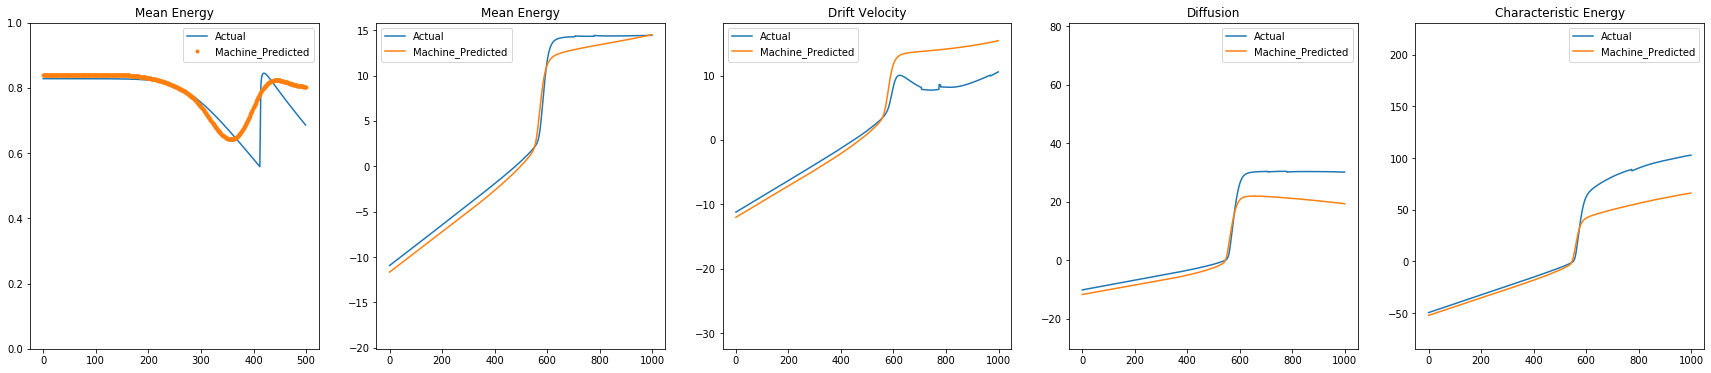

|(1000, 4)


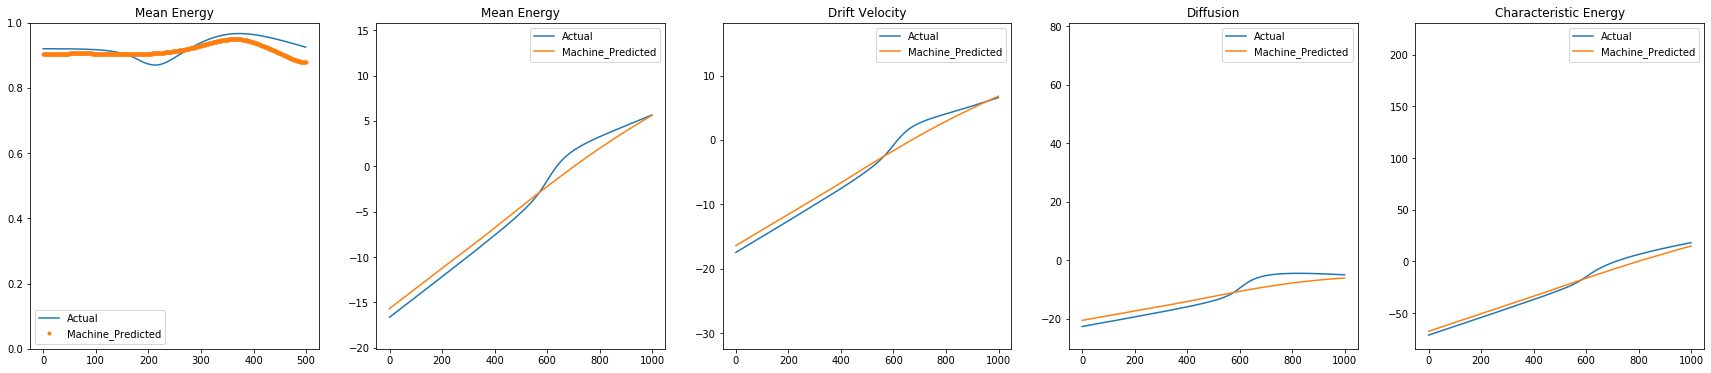

|(1000, 4)


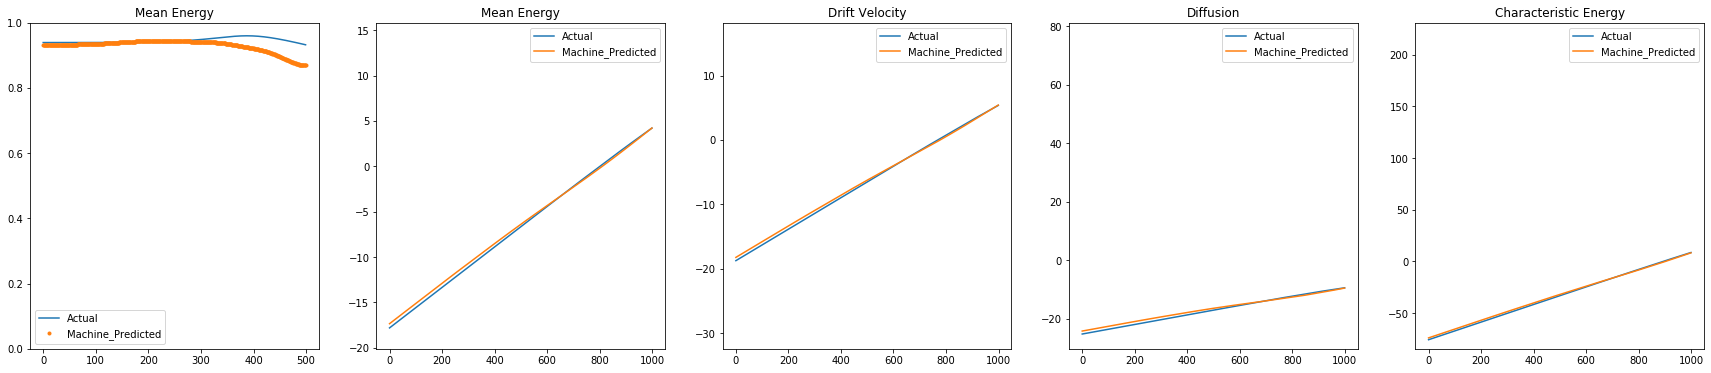

|(1000, 4)


|(1000, 4)


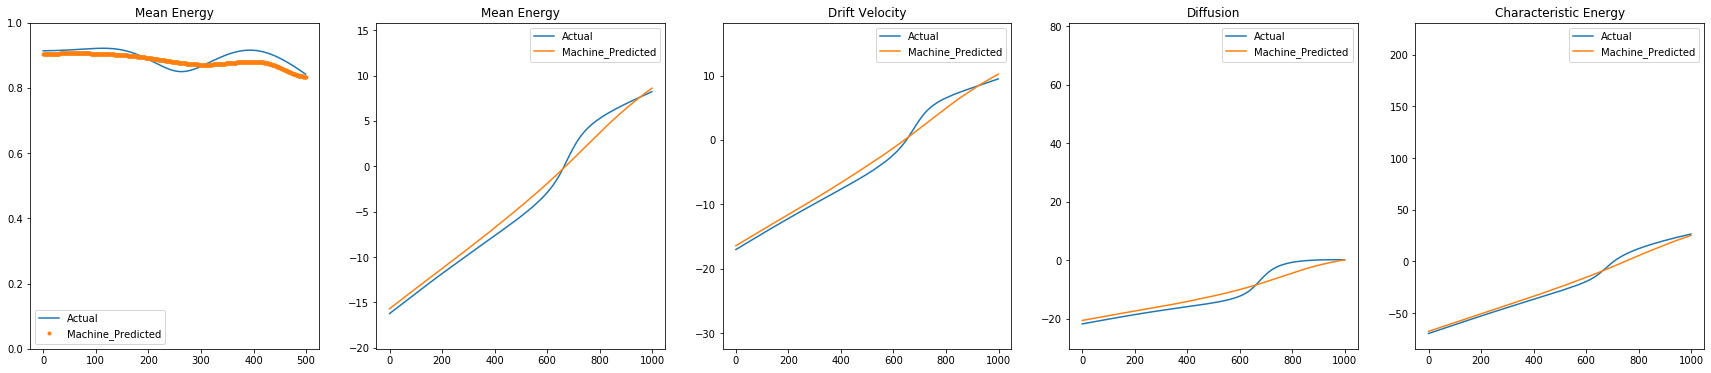

|(1000, 4)


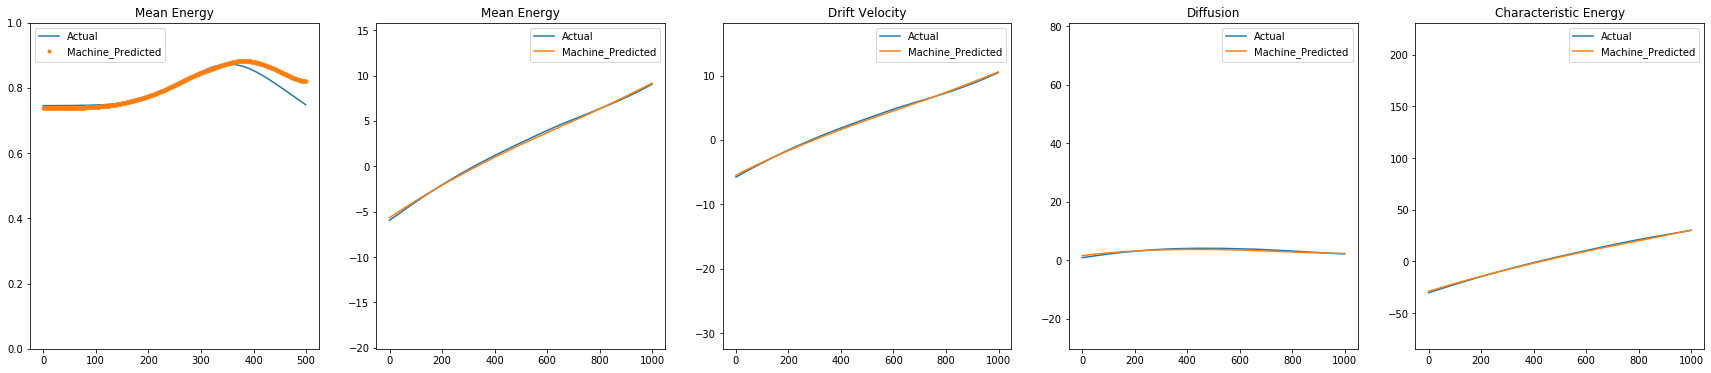

|(1000, 4)


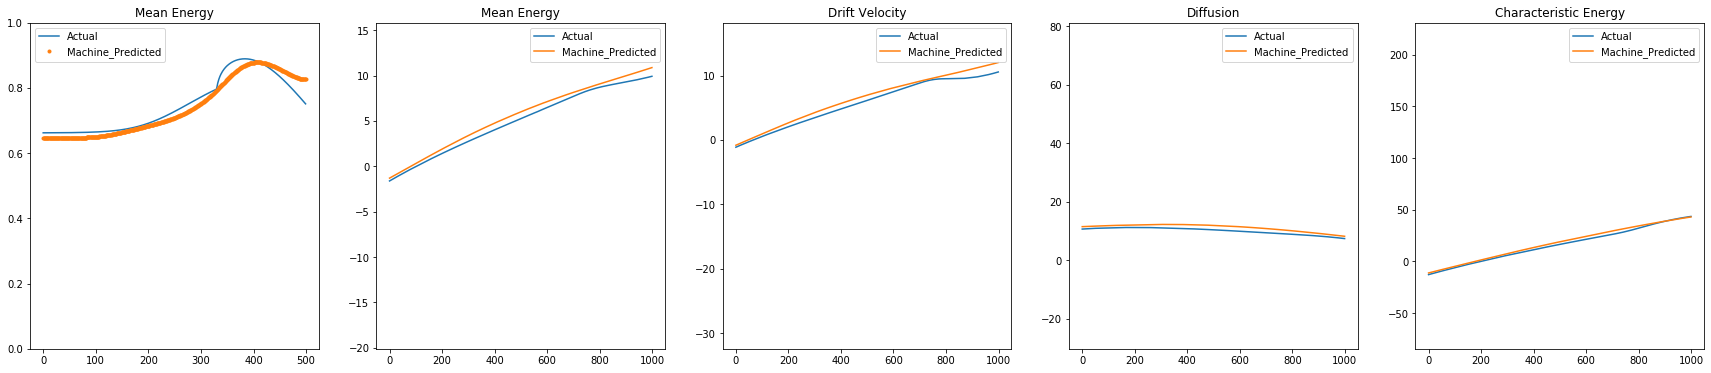

|(1000, 4)


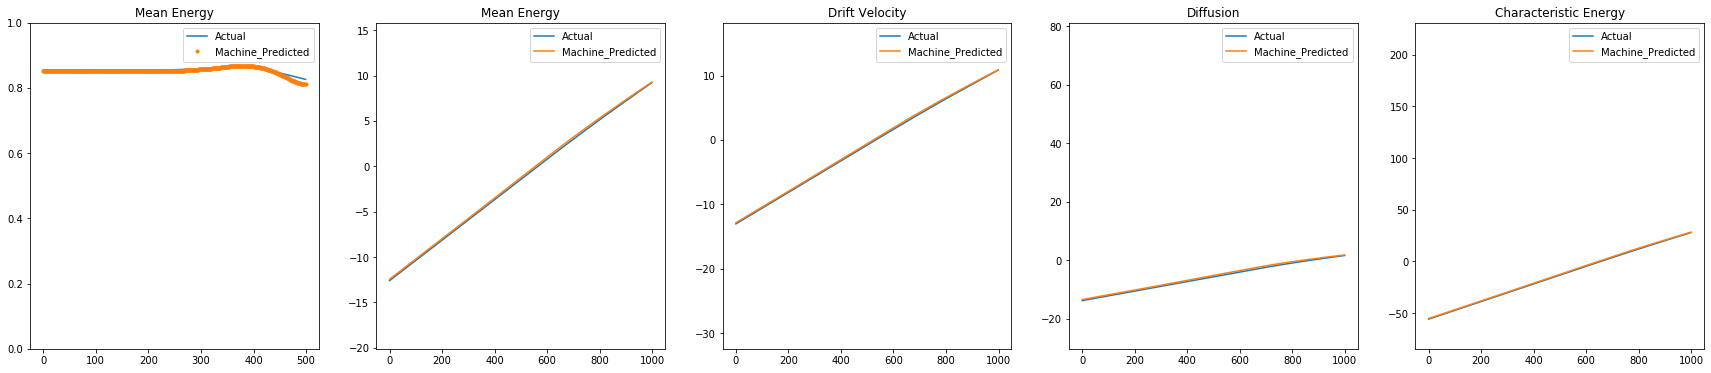

|(1000, 4)


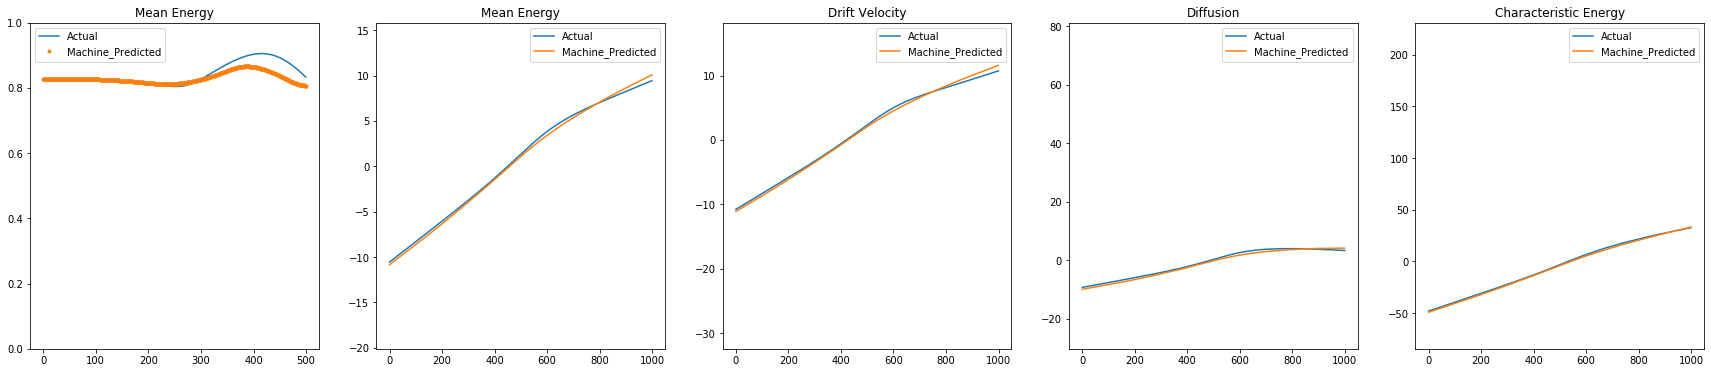

|(1000, 4)


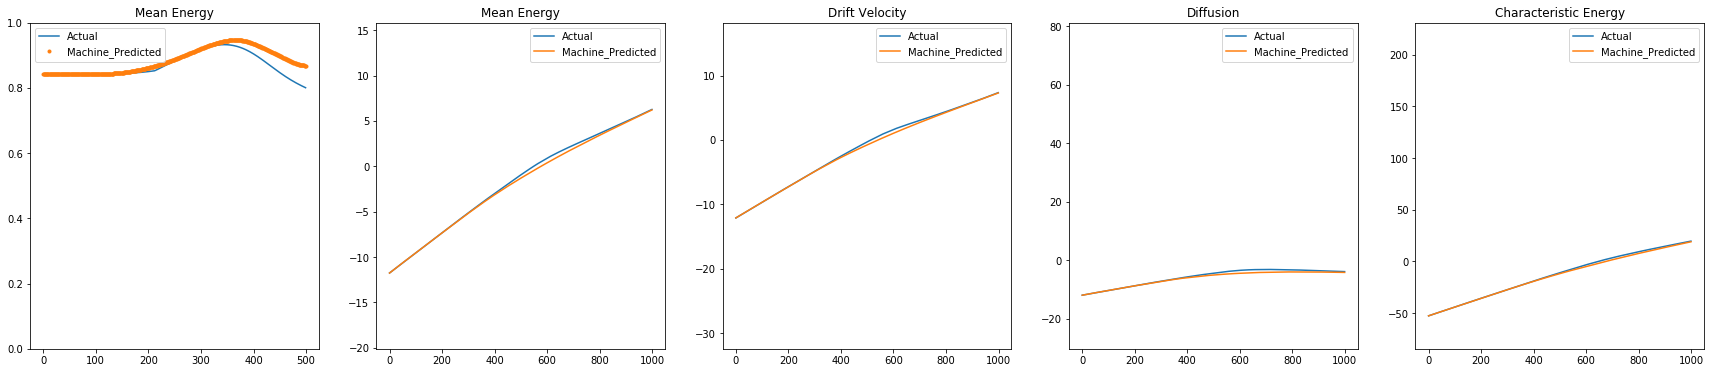

|(1000, 4)


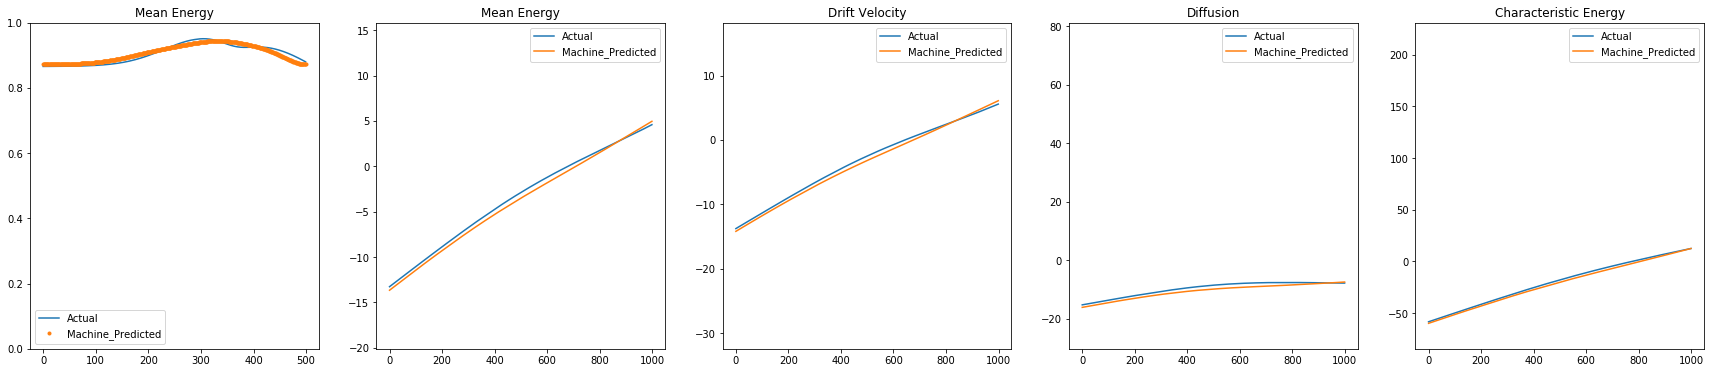

|(1000, 4)


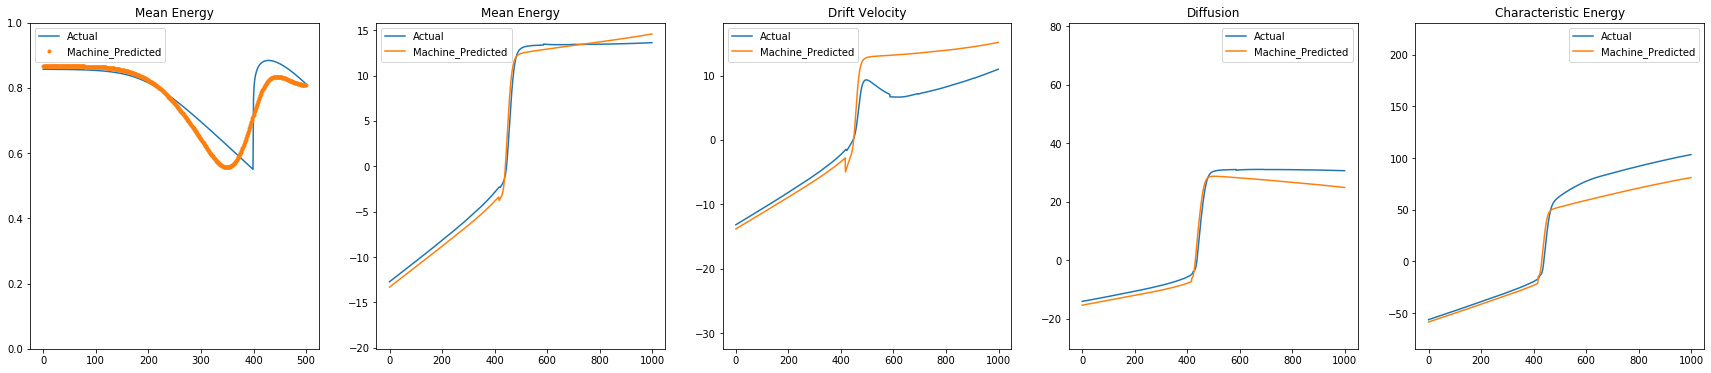

|(1000, 4)


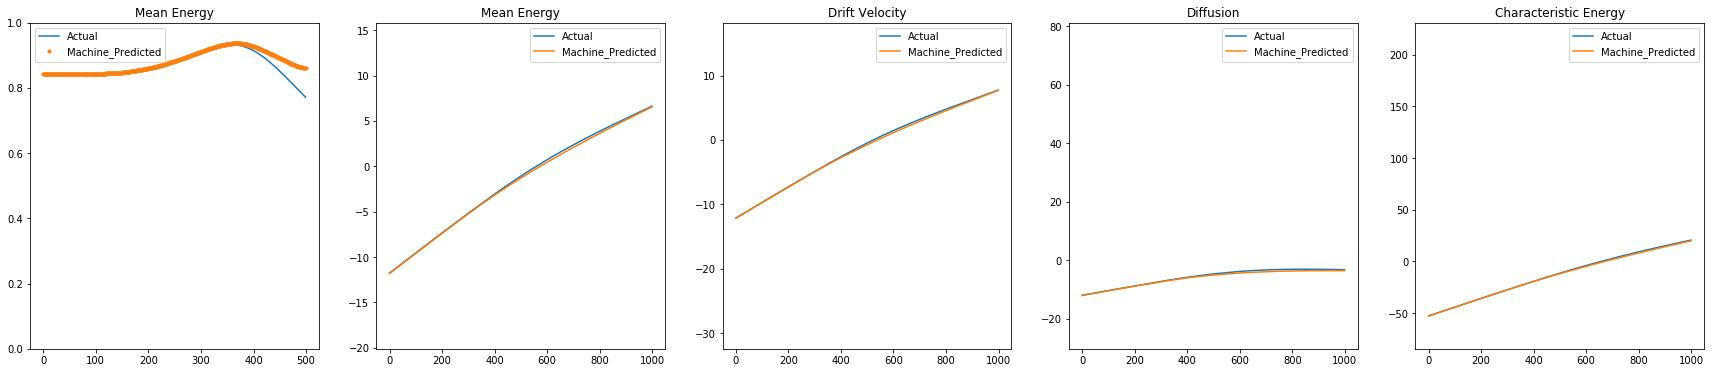

|(1000, 4)


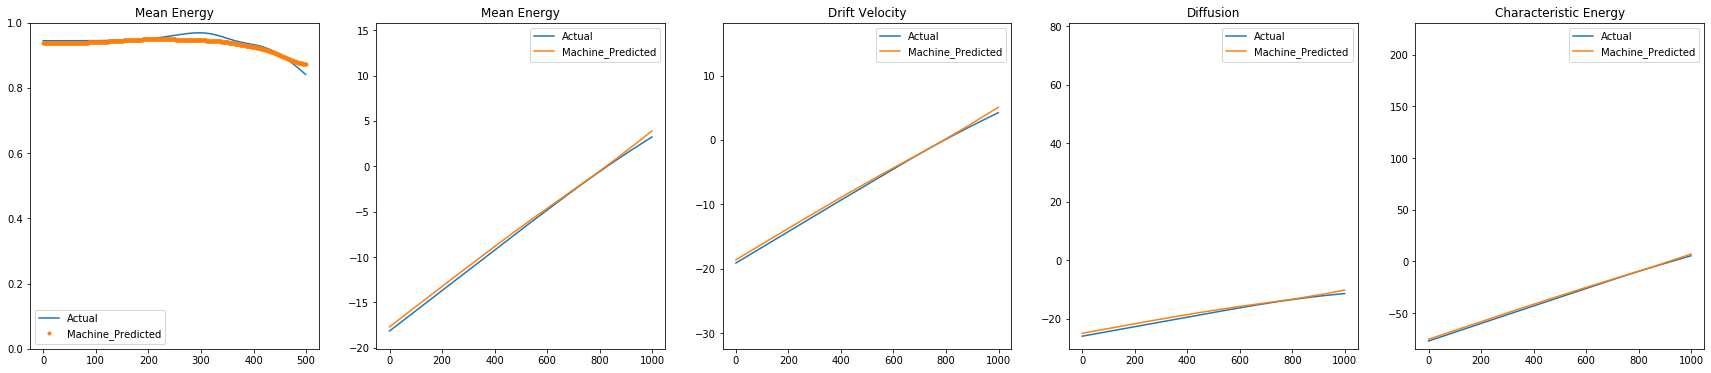

|(1000, 4)


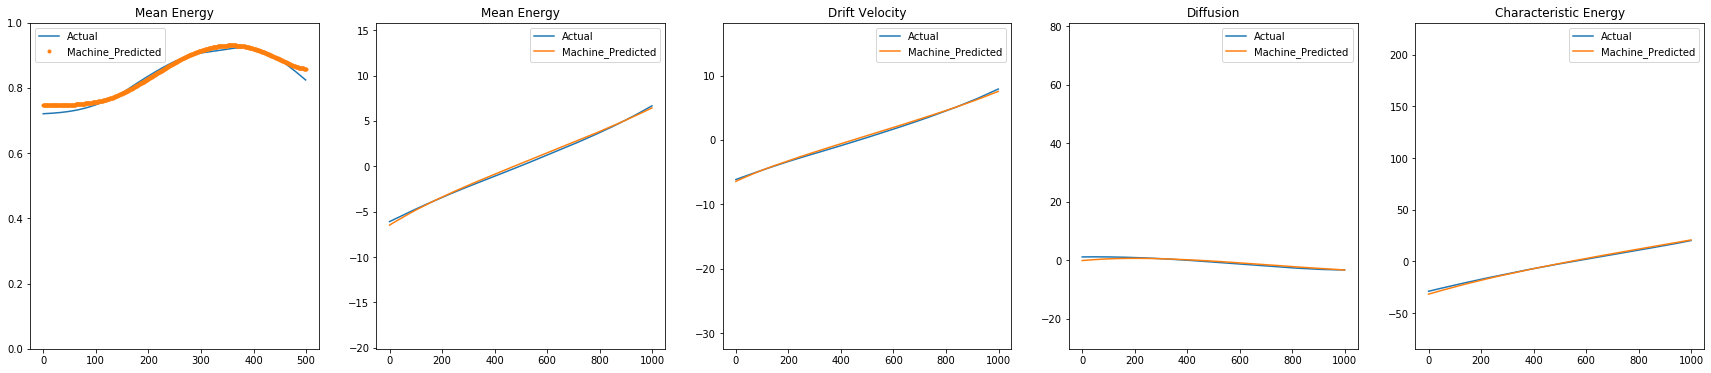

|(1000, 4)


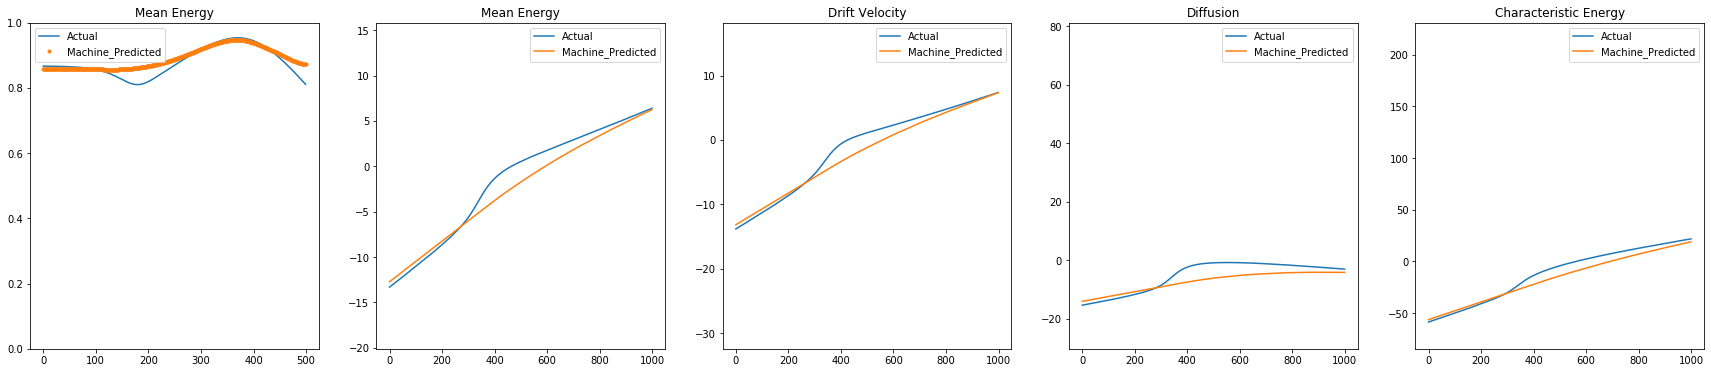

|(1000, 4)


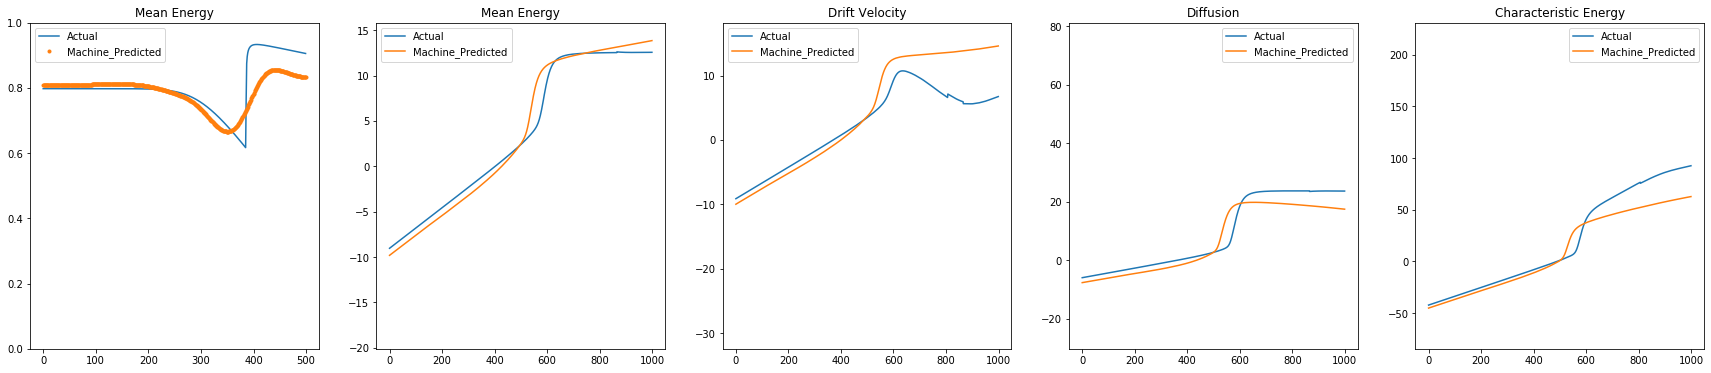

|(1000, 4)


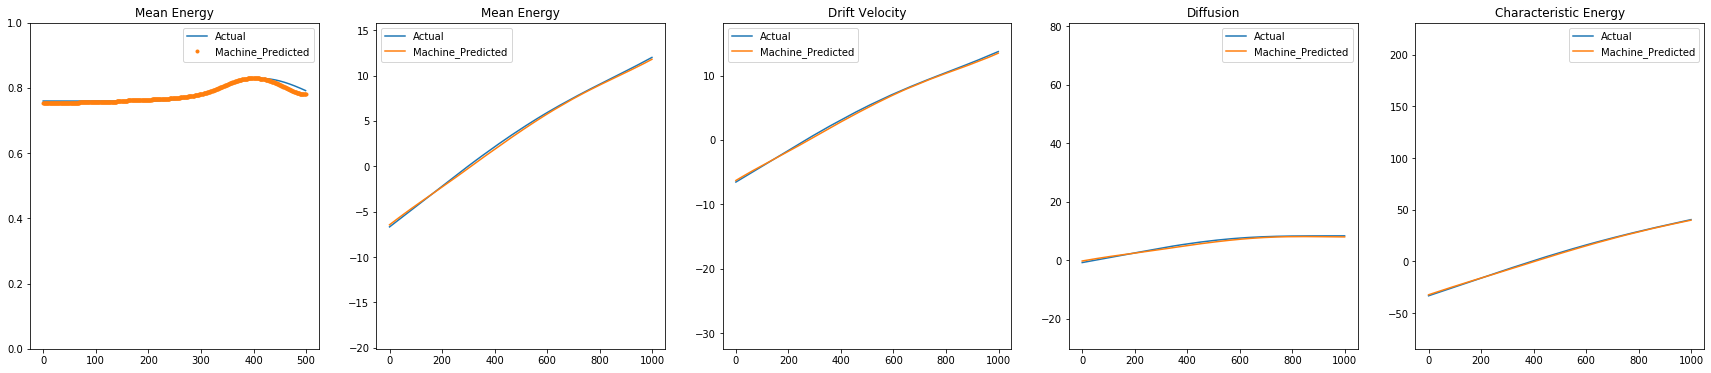

|(1000, 4)


|(1000, 4)


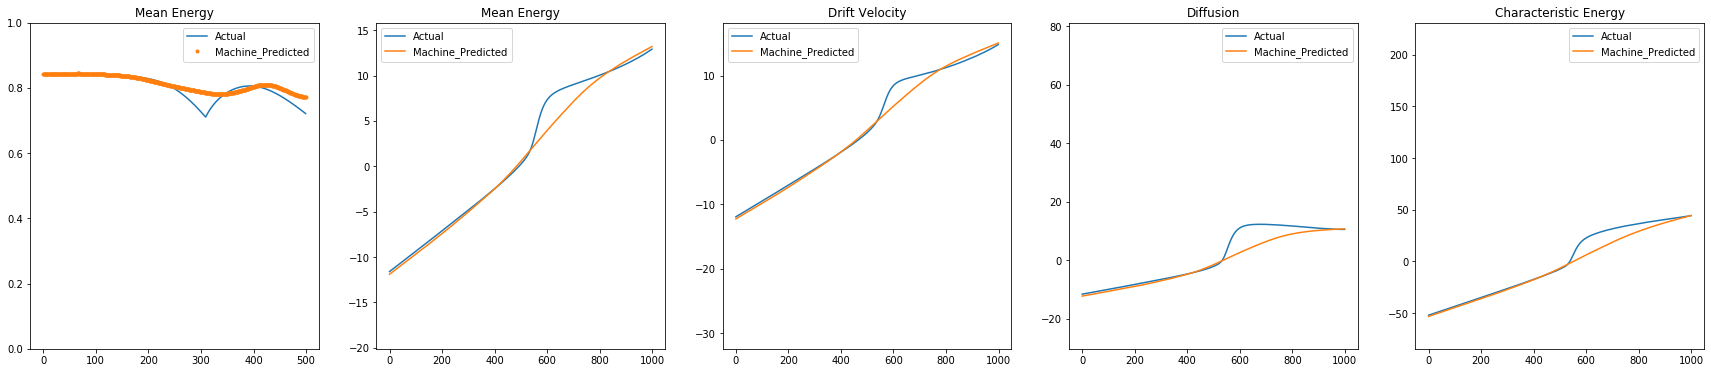

|(1000, 4)


251.30589532852173


In [21]:
#Inverting normalisation of Predicted Y
y_pred=10**((y_hat*y_max)+y_min)*1e-20

E=np.logspace(-3,3,500)

t=time.time()
for i in range(n):
    #plt.loglog(E,y_hat[i,:])
    bolsig.Input(E,y_pred[i,:])
    bolsig.ex(grid=100,n=1000,E_min=1e-3,E_max=10) #n cannot be more than 1000
    bolsig.Bolsig()
    trans=bolsig.Output(n=1000)
    print('|',end='')
    if np.sum(trans<0)>0:
        plt.loglog(E,Y[i,:]*1e20)
        plt.show()
        continue
    print(np.shape(trans))
    trans=np.log10(trans)
    #Normalisation trans to match X
    trans=np.reshape(trans,(-1,1000,4))
    for j in range(4):
        trans[:,:,j]=(trans[:,:,j]-x_mean[j])/x_std[j]
    
    fig, ax = plt.subplots(1, 5, figsize=(30,6))
    title=['Cross Section','Mean Energy',
           'Drift Velocity','Diffusion','Characteristic Energy']
    ax[0].plot(Y[i,:])
    ax[0].plot(y_hat[i,:],'.')
    ax[0].legend(['Actual','Machine_Predicted'])
    ax[0].set_title(title[1])
    ax[0].set_ylim((0,1))
    for j in range(4):
        ax[j+1].plot(np.reshape(X[i,:],(1000,4))[:,j])
        ax[j+1].plot(trans[0,:,j])
        ax[j+1].legend(['Actual','Machine_Predicted'])
        ax[j+1].set_title(title[j+1])
        ax[j+1].set_ylim((np.min(np.reshape(X,(-1,1000,4))[:,:,j]),
                          np.max(np.reshape(X,(-1,1000,4))[:,:,j])))
    plt.savefig(str(i)+'.png')
    plt.show()
print(time.time()-t)